# Sorting and Searching

# 1. Implementing a Binary Search

In [17]:
import random

# Generate a list of 10 random numbers between 0 and 50
#random_numbers = [random.randint(0, 50) for x in range(10)]
random_numbers = [3, 45, 19, 31, 47, 11, 48, 14, 8, 11]
sorted_numbers = sorted(random_numbers)
print(random_numbers)
print(sorted_numbers)

[3, 45, 19, 31, 47, 11, 48, 14, 8, 11]
[3, 8, 11, 11, 14, 19, 31, 45, 47, 48]


In [18]:
def binary_search(arr, x):
    if x in arr:        
        lp = arr[0]
        rp = arr[-1]
        mid = arr[len(arr) // 2]
        print(f"arr: {arr}, mid: {mid}, target: {x}")
        print()
        
        if x > mid:
            print(f"going right > {arr[(len(arr) // 2):]}")
            return binary_search(arr[(len(arr) // 2):], x)
        elif x < mid:
            print(f"going left > {arr[:(len(arr) // 2)]}")
            return binary_search(arr[:(len(arr) // 2)], x)
        elif x == mid:
            print(f"target found returning {mid}")
            return mid
    else:
        return f"{x} not in arr"

In [19]:
binary_search(sorted_numbers, 31)

arr: [3, 8, 11, 11, 14, 19, 31, 45, 47, 48], mid: 19, target: 31

going right > [19, 31, 45, 47, 48]
arr: [19, 31, 45, 47, 48], mid: 45, target: 31

going left > [19, 31]
arr: [19, 31], mid: 31, target: 31

target found returning 31


31

In [42]:
def binary_search_index(nums, target):
    left, right = 0, len(nums) - 1
    
    while left <= right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1


arr = [2, 8, 9, 12, 12, 17, 38, 40, 41, 45]
print(binary_search_index(arr, 17))

5


In [21]:
def binary_search_index(nums, target):
    left, right = 0, len(nums) - 1
    print(f"Initial values - left: {left}, right: {right}")
    
    while left <= right:
        mid = (left + right) // 2
        print(f"Mid value: {mid}")
        
        if nums[mid] == target:
            print(f"Target found at index {mid}")
            return mid
        elif nums[mid] < target:
            print(f"Target is greater than mid value - updating left")
            left = mid + 1
            print(f"New values - left: {left}, right: {right}")
        else:
            print(f"Target is less than mid value - updating right")
            right = mid - 1
            print(f"New values - left: {left}, right: {right}")
    
    print("Target not found")
    return -1

arr = [2, 8, 9, 12, 12, 17, 38, 40, 41, 45]
print(binary_search_index(arr, 17))



Initial values - left: 0, right: 9
Mid value: 4
Target is greater than mid value - updating left
New values - left: 5, right: 9
Mid value: 7
Target is less than mid value - updating right
New values - left: 5, right: 6
Mid value: 5
Target found at index 5
5


In [30]:
# returns the index of found element

def binary_search_recursive(arr, x, left=0, right=None):
    if right is None:
        right = len(arr) - 1
    if left <= right:
        mid = left + (right - left) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] > x:
            return binary_search_recursive(arr, x, left, mid - 1)
        else:
            return binary_search_recursive(arr, x, mid + 1, right)
    else:
        return -1

In [33]:
binary_search_recursive(sorted_numbers, 45)

8

In [143]:
# first occurence of an element in array

def first_occurrence(arr, target):
    left, right = 0, len(arr) - 1
    result = -1
    
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            result = mid
            right = mid - 1 # look for first occurrence on left side
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    
    return result

arr = [0,1,1,1,1,1,2,3,4,5,6,6]
first_occurrence(arr, 1)
# 1

1

In [150]:
# last occurence of en element in array

def find_last_occurrence(arr, target):
    left = 0
    right = len(arr) - 1
    
    last_occurrence = -1

    while left <= right:
        mid = (left + right) // 2
        
        if arr[mid] == target:
            last_occurrence = mid
            left = mid + 1
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return last_occurrence

arr = [0,1,1,1,1,1,2,3,4,5,6,6]
find_last_occurrence(arr, 1)
# 5

5

Question: Koko Eating Bananas
Medium

Koko loves to eat bananas. There are n piles of bananas, the ith pile has piles[i] bananas. The guards have gone and will come back in h hours.

Koko can decide her bananas-per-hour eating speed of k. Each hour, she chooses some pile of bananas and eats k bananas from that pile. If the pile has less than k bananas, she eats all of them instead and will not eat any more bananas during this hour.

Koko likes to eat slowly but still wants to finish eating all the bananas before the guards return.

Return the minimum integer k such that she can eat all the bananas within h hours.

 

Example 1:

Input: piles = [3,6,7,11], h = 8
Output: 4
Example 2:

Input: piles = [30,11,23,4,20], h = 5
Output: 30
Example 3:

Input: piles = [30,11,23,4,20], h = 6
Output: 23

In [5]:
def minEatingSpeed(piles, h):
    left, right = 1, max(piles)
    while left <= right:
        mid = left + (right - left) // 2
        hours = sum((pile-1)//mid + 1 for pile in piles)
        if hours <= h:
            right = mid - 1
        else:
            left = mid + 1
    return left

print(minEatingSpeed([3,6,7,11], 8))
print(minEatingSpeed([30,11,23,4,20], 5))
print(minEatingSpeed([30,11,23,4,20], 6))

4
30
23


In [26]:
def minEatingSpeed(piles, h):
    left, right = 1, max(piles)
    while left <= right:
        mid = left + (right - left) // 2
        hours = sum((pile-1)//mid + 1 for pile in piles)
        print(f"hours: {[(pile-1)//mid + 1 for pile in piles]}")
        if hours <= h:
            right = mid - 1
        else:
            left = mid + 1
        print("mid:", mid, "hours:", hours, "left:", left, "right:", right)
    return left

minEatingSpeed([3,6,7,11], 8)

hours: [1, 1, 2, 2]
mid: 6 hours: 6 left: 1 right: 5
hours: [1, 2, 3, 4]
mid: 3 hours: 10 left: 4 right: 5
hours: [1, 2, 2, 3]
mid: 4 hours: 8 left: 4 right: 3


4

In [32]:
def minEatingSpeed(piles, H):
    def feasible(speed):
        # return sum(math.ceil(pile / speed) for pile in piles) <= H  # slower        
        return sum((pile - 1) // speed + 1 for pile in piles) <= H  # faster

    left, right = 1, max(piles)
    while left < right:
        mid = left  + (right - left) // 2
        if feasible(mid):
            right = mid
        else:
            left = mid + 1
    return left

print(minEatingSpeed([3,6,7,11], 8))
# 4
print(minEatingSpeed([30,11,23,4,20], 5))
# 30
print(minEatingSpeed([30,11,23,4,20], 6))
# 23

4
30
23


In [36]:
# experiment

def minEatingSpeed(piles, H):
    def feasible(speed):
        # return sum(math.ceil(pile / speed) for pile in piles) <= H  # slower        
        return sum((pile - 1) // speed + 1 for pile in piles) <= H  # faster

    left, right = 1, max(piles)
    while left < right:
        mid = left  + (right - left) // 2
        if feasible(mid):
            right = mid
        else:
            left = mid + 1
    return left

print(minEatingSpeed([3,6,7,11], 8))
# 4
print(minEatingSpeed([30,11,23,4,20], 5))
# 30
print(minEatingSpeed([30,11,23,4,20], 6))
# 23

4
30
23


In [29]:
def minEatingSpeed(piles, H):
    def feasible(speed):
        total_hours = sum((pile - 1) // speed + 1 for pile in piles)
        print(f"Checking speed {speed}, total hours: {total_hours}")
        return total_hours <= H

    left, right = 1, max(piles)
    while left < right:
        mid = left + (right - left) // 2
        print(f"Left: {left}, Right: {right}, Mid: {mid}")
        if feasible(mid):
            right = mid
        else:
            left = mid + 1
    print(f"Final Left: {left}, Final Right: {right}")
    return left

minEatingSpeed([3,6,7,11], 8)

Left: 1, Right: 11, Mid: 6
Checking speed 6, total hours: 6
Left: 1, Right: 6, Mid: 3
Checking speed 3, total hours: 10
Left: 4, Right: 6, Mid: 5
Checking speed 5, total hours: 8
Left: 4, Right: 5, Mid: 4
Checking speed 4, total hours: 8
Final Left: 4, Final Right: 4


4

Kth Missing Positive Number

Given an array arr of positive integers sorted in a strictly increasing order, and an integer k.

Return the kth positive integer that is missing from this array.


Example 1:

Input: arr = [2,3,4,7,11], k = 5
Output: 9
Explanation: The missing positive integers are [1,5,6,8,9,10,12,13,...]. The 5th missing positive integer is 9.
Example 2:

Input: arr = [1,2,3,4], k = 2
Output: 6
Explanation: The missing positive integers are [5,6,7,...]. The 2nd missing positive integer is 6.

In [13]:
def findKthPositive(arr, k):
    n = len(arr)
    left, right = 0, n - 1
    
    while left <= right:
        mid = (left + right) // 2
        missing_count = arr[mid] - mid - 1
        
        if missing_count < k:
            left = mid + 1
        else:
            right = mid - 1
    
    return left + k

print(findKthPositive([2,3,4,7,11], 5))
# 9
print(findKthPositive([1,2,3,4], 2))
# 6

9
6


In [25]:
# experiment
def findKthPositive(arr, k):
    def condition(mid):
        missing_count = arr[mid] - mid - 1
        return missing_count < k
            
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = left + (right - left) // 2        
        if condition(mid):
            left = mid + 1
        else:
            right = mid - 1 
    
    return left + k

print(findKthPositive([2,3,4,7,11], 5))
# 9
print(findKthPositive([1,2,3,4], 2))
# 6

9
6


In [ ]:
def binary_search(array) -> int:
    def condition(value) -> bool:
        pass

    left, right = 0, len(array)
    while left < right:
        mid = left + (right - left) // 2
        if condition(mid):
            right = mid
        else:
            left = mid + 1
    return left

In [27]:
def findKthPositive(arr, k):
    n = len(arr)
    left, right = 0, n - 1
    print(f"Initial values - left: {left}, right: {right}")
    
    while left <= right:
        mid = (left + right) // 2
        missing_count = arr[mid] - mid - 1
        print(f"Mid value: {mid}, Missing Count: {missing_count}")
        
        if missing_count < k:
            print(f"Missing count less than k - updating left")
            left = mid + 1
            print(f"New values - left: {left}, right: {right}")
        else:
            print(f"Missing count greater than or equal to k - updating right")
            right = mid - 1
            print(f"New values - left: {left}, right: {right}")
    
    print(f"Final values - left: {left}, right: {right}")
    return left + k

print(findKthPositive([2,3,4,7,11], 5))
# 9
print(findKthPositive([1,2,3,4], 2))
# 6

Initial values - left: 0, right: 4
Mid value: 2, Missing Count: 1
Missing count less than k - updating left
New values - left: 3, right: 4
Mid value: 3, Missing Count: 3
Missing count less than k - updating left
New values - left: 4, right: 4
Mid value: 4, Missing Count: 6
Missing count greater than or equal to k - updating right
New values - left: 4, right: 3
Final values - left: 4, right: 3
9
Initial values - left: 0, right: 3
Mid value: 1, Missing Count: 0
Missing count less than k - updating left
New values - left: 2, right: 3
Mid value: 2, Missing Count: 0
Missing count less than k - updating left
New values - left: 3, right: 3
Mid value: 3, Missing Count: 0
Missing count less than k - updating left
New values - left: 4, right: 3
Final values - left: 4, right: 3
6


Write an efficient algorithm that searches for a value target in an m x n integer matrix matrix. This matrix has the following properties:

Integers in each row are sorted in ascending from left to right.
Integers in each column are sorted in ascending from top to bottom.
 

Example 1:


Input: matrix = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]], target = 5
Output: true
Example 2:


Input: matrix = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]], target = 20
Output: false

In [68]:
class Solution:
    def searchMatrix(self, matrix, target):
        m = len(matrix) -1
        n = len(matrix[0]) -1
        
        for x in range(0,n+1):
            l = 0
            r = m
            
            while l <= r:
                mid = (l+r) // 2
                
                if matrix[mid][x] == target:
                    return True
                elif matrix[mid][x] < target:
                    l = mid + 1
                else:
                    r = mid - 1
        return False

matrix1 = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]]
target1 = 5

matrix2 = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]]
target2 = 20

matrix3 = [[-5]]
target3 = -5

o = Solution()
res1 = o.searchMatrix(matrix1, target1)
res2 = o.searchMatrix(matrix2, target2)
res3 = o.searchMatrix(matrix3, target3)

print(res1)
print(res2)
print(res3)

True
False
True


In [71]:
# solution with generalized template, doesnt work properly, can not pass all the tests

class Solution:
    def searchMatrix(self, matrix, target):
        m = len(matrix) -1
        n = len(matrix[0]) -1
        
        for x in range(0,n+1):
            l = 0
            r = m
            mid = (l+r) // 2 # temp solution
            
            while l < r:
                mid = (l+r) // 2
                
                if matrix[mid][x] <= target:
                    l = mid + 1
                else:
                    r = mid
                    
            if matrix[mid][x] == target:
                return True
        return False

matrix1 = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]]
target1 = 5

matrix2 = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]]
target2 = 20

matrix3 = [[-5]]
target3 = -5

o = Solution()
res1 = o.searchMatrix(matrix1, target1)
res2 = o.searchMatrix(matrix2, target2)
res3 = o.searchMatrix(matrix3, target3)

print(res1)
print(res2)
print(res3)

True
False
True


In [57]:
# chatgpt prompt

class Solution:
    def searchMatrix(self, matrix, target) -> bool:
        if not matrix or not matrix[0]:  # empty matrix or empty rows
            return False
        
        m, n = len(matrix), len(matrix[0])
        row, col = 0, n - 1  # start from top-right corner
        
        while row < m and col >= 0:
            if matrix[row][col] == target:
                return True
            elif matrix[row][col] < target:
                row += 1  # move down
            else:
                col -= 1  # move left
                
        return False
    

o = Solution()
res1 = o.searchMatrix(matrix1, target1)
res2 = o.searchMatrix(matrix2, target2)

print(res1) # True
print(res2) # False

True
False


# 1.1 Most Generalized Binary Search (Template)

Suppose we have a search space. It could be an array, a range, etc. Usually it's sorted in ascend order. For most tasks, we can transform the requirement into the following generalized form:

Minimize k , s.t. condition(k) is True

The following code is the most generalized binary search template:

In [66]:
def binary_search(array) -> int:
    def condition(value) -> bool:
        pass

    left, right = 0, len(array)
    while left < right:
        mid = left + (right - left) // 2
        if condition(mid):
            right = mid
        else:
            left = mid + 1
    return left

What's really nice of this template is that, for most of the binary search problems, we only need to modify three parts after copy-pasting this template, and never need to worry about corner cases and bugs in code any more:

* Correctly initialize the boundary variables left and right. Only one rule: set up the boundary to include all possible elements;

* Decide return value. Is it return left or return left - 1? Remember this: after exiting the while loop, left is the minimal k​ satisfying the condition function;

* Design the condition function. This is the most difficult and most beautiful part. Needs lots of practice.
Below I'll show you guys how to apply this powerful template to many LeetCode problems.



In [69]:
def mySqrt(x: int) -> int:
    left, right = 0, x
    while left < right:
        mid = left + (right - left) // 2
        if mid * mid <= x:
            left = mid + 1
        else:
            right = mid
    return left - 1

mySqrt(10)

3

In [77]:
def mySqrt(x: int) -> int:
    print(f"x: {x}")
    left, right = 0, x
    while left < right:
        mid = left + (right - left) // 2
        print(f"mid: {mid}")
        if mid * mid <= x:
            print(f"{mid} * {mid} <= {x}")
            left = mid + 1
            print(f"left: {left}")
        else:
            print(f"{mid} * {mid} > {x}")
            right = mid
            print(f"right: {right}")
        print("##### loop end #####")
    print(f"left: {left}, right: {right} --- exiting loop")
    print(f"return left-1: {left-1}")
    return left - 1

mySqrt(10)

x: 10
mid: 5
5 * 5 > 10
right: 5
##### loop end #####
mid: 2
2 * 2 <= 10
left: 3
##### loop end #####
mid: 4
4 * 4 > 10
right: 4
##### loop end #####
mid: 3
3 * 3 <= 10
left: 4
##### loop end #####
left: 4, right: 4 --- exiting loop
return left-1: 3


3

# ##################################################################

Search Insert Position [Easy]

Given a sorted array and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order. You may assume no duplicates in the array.

Example:

Input: [1,3,5,6], 5
Output: 2

Input: [1,3,5,6], 2
Output: 1

In [109]:
# incorrect, do it again

def insert(arr, x):
    left, right = 0, len(arr)
    while left < right:
        mid = left + (right - left) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    return mid
            
print(insert([1,3,5,6],5)) 
# 2
print(insert([1,3,5,6],2)) 
# 1
print(insert([1,3,5,6,7,8,10],9)) 
# 6

2
0
6


In [105]:
# template utilization

def insert(arr, x):
    left, right = 0, len(arr)
    while left < right:
        mid = left + (right - left) // 2
        if arr[mid] <= x:
            left = mid + 1
        else:
            right = mid
    return left
            
print(insert([1,3,5,6],5)) 
# 2
print(insert([1,3,5,6],2)) 
# 1
print(insert([1,3,5,6,7,8,10],9)) 
# 6

3
1
6


In [106]:
# directly from leetcode template advice (adjusted template)

def searchInsert(nums, target):
    left, right = 0, len(nums)
    while left < right:
        mid = left + (right - left) // 2
        if nums[mid] >= target:
            right = mid
        else:
            left = mid + 1
    return left

print(searchInsert([1,3,5,6],5)) 
# 2
print(searchInsert([1,3,5,6],2)) 
# 1
print(searchInsert([1,3,5,6,7,8,10],9)) 
# 6

2
1
6


Question: Find the first occurance of an element in an array

In [123]:
def find_first(arr, x):
    left, right = 0, len(arr)
    while left < right:
        mid = left + (right - left) // 2
        if arr[mid] >= x:
            right = mid
        else:
            left = mid + 1
    return left
    
print(find_first([1, 2, 3, 3, 3, 4, 5, 6], 3))
# 2
print(find_first([1, 2, 3, 3, 3, 4, 4, 5, 6], 4))
# 5

2
5


Question: Find the last occurance of an element in an array

In [121]:
def find_last(arr, target):
    left = 0
    right = len(arr) - 1
    last_occurrence = -1

    while left <= right:
        mid = (left + right) // 2
        
        if arr[mid] == target:
            last_occurrence = mid
            left = mid + 1
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return last_occurrence
    
print(find_last([1, 2, 3, 3, 3, 4, 5, 6], 3))
# 4
print(find_last([1, 2, 3, 3, 3, 4, 4, 5, 6], 4))
# 6

4
6


# ##################################################################

# 2. Find Peak Element (leetCode best medium interview questions)

A peak element is an element that is strictly greater than its neighbors.

Given a 0-indexed integer array nums, find a peak element, and return its index. If the array contains multiple peaks, return the index to any of the peaks.

You may imagine that nums[-1] = nums[n] = -∞. In other words, an element is always considered to be strictly greater than a neighbor that is outside the array.

You must write an algorithm that runs in O(log n) time.

 

Example 1:

Input: nums = [1,2,3,1]
Output: 2
Explanation: 3 is a peak element and your function should return the index number 2.
Example 2:

Input: nums = [1,2,1,3,5,6,4]
Output: 5
Explanation: Your function can return either index number 1 where the peak element is 2, or index number 5 where 

# 2.1 Linear Search

In [34]:
import random

# Generate a list of 10 random numbers between 0 and 50
nums_rand = [random.randint(0, 50) for x in range(10)]
print(nums_rand)

[1, 18, 36, 37, 0, 5, 2, 42, 9, 44]


In [35]:
def findPeakElement(nums):
    for i in range(len(nums) - 1):
        if nums[i] > nums[i + 1]:
            print("for: ", i)
            return i 
    print("func: ", len(nums) - 1)
    return len(nums) - 1


nums = [6,5,4,3,2,1]
nums2 = [1,2,3,4,5,6,5]
print(findPeakElement(nums))
print(findPeakElement(nums2))
print(findPeakElement(nums_rand))

for:  0
0
for:  5
5
for:  3
3


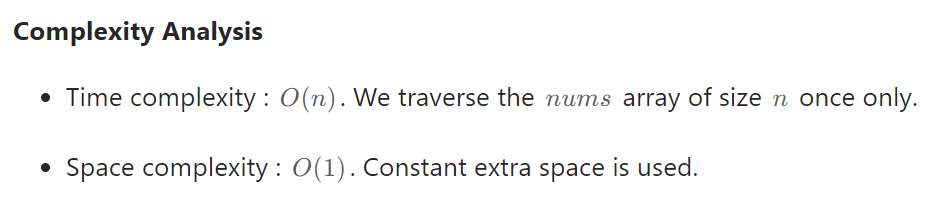

# 2.2 Iterative Binary Search

In [43]:
def findPeakElement(nums):
    l, r = 0, len(nums) - 1
    while l < r:
        mid = (l + r) // 2
        if nums[mid] > nums[mid + 1]:
            r = mid
        else:
            l = mid + 1
    return l
 
nums = [6,5,4,3,2,1]
nums2 = [1,2,3,4,5,6,5]
print(findPeakElement(nums))
print(findPeakElement(nums2))

0
5


In [38]:
def findPeakElement(nums):
    l, r = 0, len(nums) - 1
    while l < r:
        mid = (l + r) // 2
        print(f"mid = {mid}")
        if nums[mid] > nums[mid + 1]:
            r = mid
            print(f"r = {r}")
            print(f"going left: {nums[:r]}")
            print()
        else:
            l = mid + 1
            print(f"l = {l}")
            print(f"going right: {nums[l:]}")
            print()
    return r, l

nums = [6,5,4,3,2,1]
nums2 = [1,2,3,4,5,6,5,4,3,2]
#print(findPeakElement(nums))
print(findPeakElement(nums2))

mid = 4
l = 5
going right: [6, 5, 4, 3, 2]

mid = 7
r = 7
going left: [1, 2, 3, 4, 5, 6, 5]

mid = 6
r = 6
going left: [1, 2, 3, 4, 5, 6]

mid = 5
r = 5
going left: [1, 2, 3, 4, 5]

(5, 5)


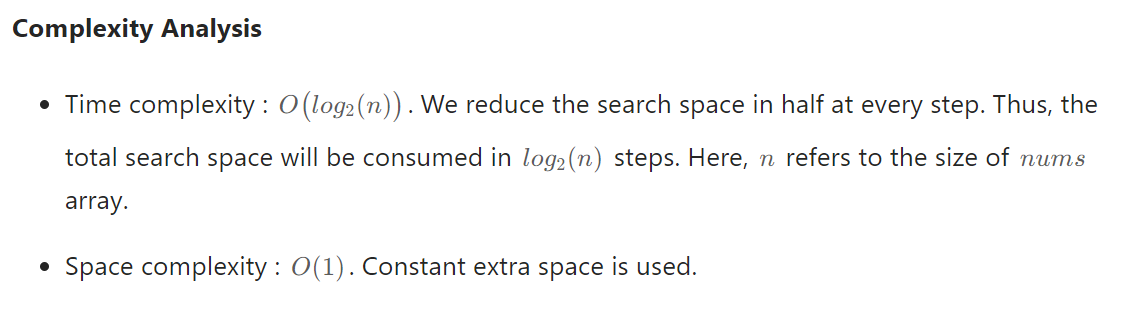

# 2.3 Recursive Binary Search

In [23]:
def findPeakElement(nums):
    def search(nums, l, r):
        if l == r:
            return l
        mid = (l + r) // 2
        if nums[mid] > nums[mid + 1]:
            return search(nums, l, mid)
        return search(nums, mid + 1, r)

    return search(nums, 0, len(nums) - 1)

nums = [6,5,4,3,2,1]
nums2 = [1,2,3,4,5,6,5]
print(findPeakElement(nums))
print(findPeakElement(nums2))

0
5


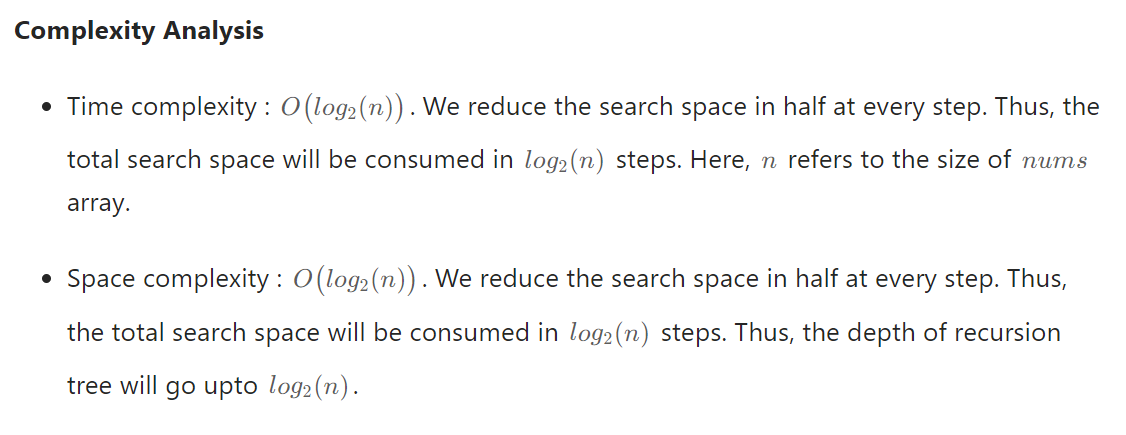

# 3. Search for a Range (leetCode best medium interview questions)

Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value.

If target is not found in the array, return [-1, -1].

You must write an algorithm with O(log n) runtime complexity.

In [10]:
def searchRange(nums, target):
    def binarySearchLeft(nums, target):
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] >= target:
                right = mid - 1
                print(f"left,right:{left},{right}")
            else:
                left = mid + 1
                print(f"left,right:{left},{right}")
        print(f"left returned: {left}")
        return left
    
    def binarySearchRight(nums, target):
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] > target:
                right = mid - 1
                print(f"left,right:{left},{right}")
            else:
                left = mid + 1
                print(f"left,right:{left},{right}")
        print(f"right returned: {right}")
        return right
    
    left = binarySearchLeft(nums, target)
    if left == len(nums) or nums[left] != target:
        return [-1, -1]
    right = binarySearchRight(nums, target)
    return [left, right]
    
nums = [5,7,7,8,8,10]

print(searchRange(nums, 8))

left,right:3,5
left,right:3,3
left,right:3,2
left returned: 3
left,right:3,5
left,right:5,5
left,right:5,4
right returned: 4
[3, 4]


Complexity Analysis: O(logn)

In [2]:
# practice

def binary_search_left(nums, target):
    left, right = 0, len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        print("Left search: left =", left, "right =", right, "mid =", mid)
        if nums[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return left

def binary_search_right(nums, target):
    left, right = 0, len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        print("Right search: left =", left, "right =", right, "mid =", mid)
        if nums[mid] <= target:
            left = mid + 1
        else:
            right = mid - 1
    return right

def search_range(nums, target):
    left_idx = binary_search_left(nums, target)
    if left_idx == len(nums) or nums[left_idx] != target:
        return [-1, -1]
    
    right_idx = binary_search_right(nums, target)
    return [left_idx, right_idx]

nums = [5,7,7,8,8,10]

print(search_range(nums, 8))

Left search: left = 0 right = 5 mid = 2
Left search: left = 3 right = 5 mid = 4
Left search: left = 3 right = 3 mid = 3
Right search: left = 0 right = 5 mid = 2
Right search: left = 3 right = 5 mid = 4
Right search: left = 5 right = 5 mid = 5
[3, 4]


In [5]:
# favourite

class Solution:
    def searchRange(self, nums, target):
        # Initialize left and right pointers
        left, right = 0, len(nums) - 1
        
        # Initialize result array to store starting and ending position
        result = [-1, -1]
        
        # Binary search for starting position of target
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] >= target:
                right = mid - 1
            else:
                left = mid + 1
            if nums[mid] == target:
                result[0] = mid
                
        # Binary search for ending position of target
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] <= target:
                left = mid + 1
            else:
                right = mid - 1
            if nums[mid] == target:
                result[1] = mid
        
        # Return result array
        return result

obj = Solution()
print(obj.searchRange([5,7,7,8,8,10], 8))

[3, 4]


In [19]:
class Solution:
    def searchRange(self, nums, target):
        # Initialize left and right pointers
        left, right = 0, len(nums) - 1
        
        # Initialize result array to store starting and ending position
        result = [-1, -1]
        
        print("left search: ")
        # Binary search for starting position of target
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] >= target:
                right = mid - 1
            else:
                left = mid + 1
            if nums[mid] == target:
                result[0] = mid
            print("left:", left, "right:", right, "mid:", mid, "nums[mid]:", nums[mid], "result:", result)
        
        print("right search: ")
        # Binary search for ending position of target
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] <= target:
                left = mid + 1
            else:
                right = mid - 1
            if nums[mid] == target:
                result[1] = mid
            print("left:", left, "right:", right, "mid:", mid, "result:", result)
        
        # Return result array
        return result

obj = Solution()
print(obj.searchRange([5,7,7,8,8,10], 8))

left search: 
left: 3 right: 5 mid: 2 nums[mid]: 7 result: [-1, -1]
left: 3 right: 3 mid: 4 nums[mid]: 8 result: [4, -1]
left: 3 right: 2 mid: 3 nums[mid]: 8 result: [3, -1]
right search: 
left: 3 right: 5 mid: 2 result: [3, -1]
left: 5 right: 5 mid: 4 result: [3, 4]
left: 5 right: 4 mid: 5 result: [3, 4]
[3, 4]


# 4. Merge Intervals (leetCode best medium interview questions)

Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

 

Example 1:

Input: intervals = [[1,3],[2,6],[8,10],[15,18]]

Output: [[1,6],[8,10],[15,18]]
Explanation: Since intervals [1,3] and [2,6] overlap, merge them into [1,6].

In [20]:
def merge(intervals):

    intervals.sort(key=lambda x: x[0])
    print(f"sorted intervals: {intervals}")
    
    merged = []
    for interval in intervals:
        # if the list of merged intervals is empty or if the current
        # interval does not overlap with the previous, simply append it.
        if not merged or merged[-1][1] < interval[0]:
            merged.append(interval)
        else:
        # otherwise, there is overlap, so we merge the current and previous
        # intervals.
            merged[-1][1] = max(merged[-1][1], interval[1])

    return merged

intervals = [[15,18],[1,3],[2,6],[8,10]]


print(merge(intervals))

sorted intervals: [[1, 3], [2, 6], [8, 10], [15, 18]]
[[1, 6], [8, 10], [15, 18]]


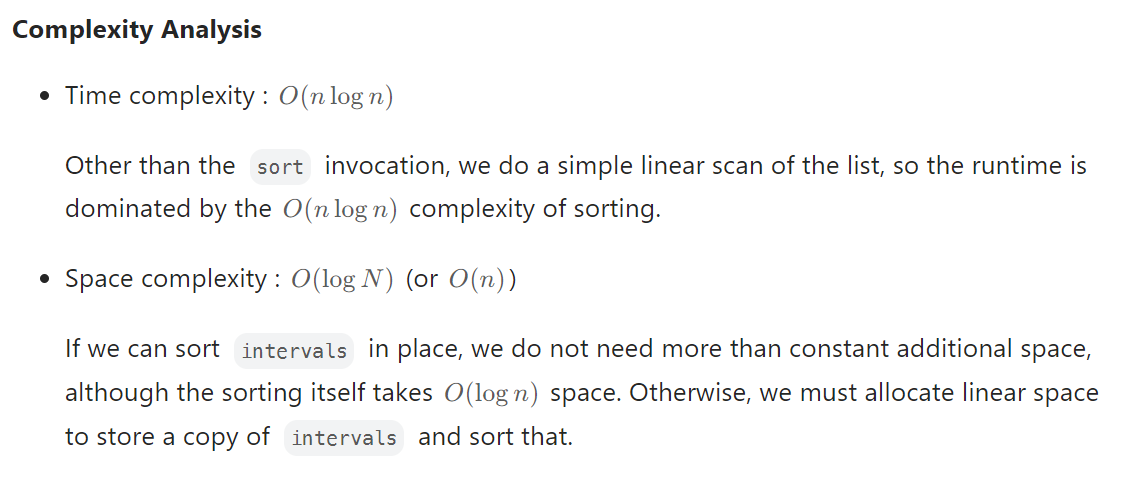

# 5. Largest Element in an Array via Binary Search

In [ ]:
# input arr has to be sorted in order to utilize binary search

def largestBS(arr):
    
    pivot = arr[len(arr) // 2]
    
    if pivot 
    

# 6. Kth Largest Element in an Array (leetCode best medium interview questions)

Given an integer array nums and an integer k, return the kth largest element in the array.

Note that it is the kth largest element in the sorted order, not the kth distinct element.

You must solve it in O(n) time complexity.

 

Example 1:

Input: nums = [3,2,1,5,6,4], k = 2
Output: 5

Example 2:

Input: nums = [3,2,3,1,2,4,5,5,6], k = 4
Output: 4

In [25]:
def kth_largest(arr, k):
    if k == 0:
        return "k should be greater than 0"
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]
    middle = [x for x in arr if x == pivot]

    if k <= len(right):
        return kth_largest(right, k)
    elif k <= len(right) + len(middle):
        return middle[0]
    else:
        return kth_largest(left, k - len(right) - len(middle))

arr = [3,0,10,3,5,4,1,2,6,7]    

print(kth_largest(arr, 6)) #3
print("-----------------------")
print(kth_largest(arr, 1)) #10
print("-----------------------")
print(kth_largest(arr, 3)) #6
print("-----------------------")
print(kth_largest(arr, 0)) 

3
-----------------------
10
-----------------------
6
-----------------------
k should be greater than 0


In [17]:
# practice time comp: O(n)

def kth_largest(arr, k):
    if k == 0:
        return "k should be greater than 0"
    
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]
    middle = [x for x in arr if x == pivot]
    
    if len(right) >= k:
        return kth_largest(right, k)
    elif len(right)+len(middle) >= k:
        return middle[0]
    else:
        return kth_largest(left, k - len(right) - len(middle))

#arr = list(set([random.randint(0,50) for x in range(10)]))
arr = [3,0,10,3,5,4,1,2,6,7]
print(arr)
print(kth_largest(arr, 3))

print(kth_largest(arr, 6)) #3
print("-----------------------")
print(kth_largest(arr, 1)) #10
print("-----------------------")
print(kth_largest(arr, 3)) #6
print("-----------------------")
print(kth_largest(arr, 0)) 

[3, 0, 10, 3, 5, 4, 1, 2, 6, 7]
6
3
-----------------------
10
-----------------------
6
-----------------------
k should be greater than 0


In [16]:
# kth largest, do with heap
# time comp: O(n log k), space comp: O(k)

import heapq

def kth_largest(arr, k):
    if k == 0:
        return "k should be greater than 0"

    # Create a min-heap of size k
    heap = arr[:k]
    heapq.heapify(heap)

    # For each element in the array, if it's larger than the smallest element in the heap,
    # replace the smallest element with it
    for i in range(k, len(arr)):
        if arr[i] > heap[0]:
            heapq.heapreplace(heap, arr[i])

    # The kth largest element will be the smallest element in the heap
    return heap[0]

arr = [3,0,10,3,5,4,1,2,6,7]

print(kth_largest(arr, 6)) #3
print("-----------------------")
print(kth_largest(arr, 1)) #10
print("-----------------------")
print(kth_largest(arr, 3)) #6
print("-----------------------")
print(kth_largest(arr, 0))


3
-----------------------
10
-----------------------
6
-----------------------
k should be greater than 0


In [9]:
# kth largest, do with heap
# time comp: O(k) + O((N - k) log k), space comp: O(k)

import heapq

def kth_largest(arr, k):
    if k == 0:
        return "k should be greater than 0"

    # Create a min-heap of size k
    heap = arr[:k]
    heapq.heapify(heap)
    print("initial heap", heap)

    # For each element in the array, if it's larger than the smallest element in the heap,
    # replace the smallest element with it
    for i in range(k, len(arr)):
        if arr[i] > heap[0]:
            temp = heap[0]
            heapq.heapreplace(heap, arr[i])
            print(f"changing {temp} with {arr[i]} in {heap}")
   
    # The kth largest element will be the smallest element in the heap
    print("final heap: ", heap)
    return heap[0]

arr = [3,0,10,3,5,4,1,2,6,7]

print(kth_largest(arr, 6)) #3
print("-----------------------")
print(kth_largest(arr, 1)) #10
print("-----------------------")
print(kth_largest(arr, 3)) #6
print("-----------------------")
print(kth_largest(arr, 0))


initial heap [0, 3, 4, 3, 5, 10]
changing 0 with 1 in [1, 3, 4, 3, 5, 10]
changing 1 with 2 in [2, 3, 4, 3, 5, 10]
changing 2 with 6 in [3, 3, 4, 6, 5, 10]
changing 3 with 7 in [3, 5, 4, 6, 7, 10]
final heap:  [3, 5, 4, 6, 7, 10]
3
-----------------------
initial heap [3]
changing 3 with 10 in [10]
final heap:  [10]
10
-----------------------
initial heap [0, 3, 10]
changing 0 with 3 in [3, 3, 10]
changing 3 with 5 in [3, 5, 10]
changing 3 with 4 in [4, 5, 10]
changing 4 with 6 in [5, 6, 10]
changing 5 with 7 in [6, 7, 10]
final heap:  [6, 7, 10]
6
-----------------------
k should be greater than 0


Sure, let's analyze the time complexity of the kth_largest function:

Creating a min-heap of size k from the first k elements of the input array: O(k).

The heapify operation on the heap of size k: O(k).

The loop that iterates N - k times (where N is the length of the input array), and each iteration includes a heapreplace operation that takes O(log k) time: O((N - k) log k).

The overall time complexity of the kth_largest function would be O(k) + O(k) + O((N - k) log k). Since both O(k) and O((N - k) log k) depend on the size of the input, we cannot disregard any term. Therefore, the time complexity remains O(k) + O((N - k) log k).

The space complexity is O(k) as we create a heap of size k.

In [2]:
def kth_largest(arr, k):
    heap = arr[:k]
    
    import heapq
    heapq.heapify(heap)
    
    for i in range(k, len(arr)):
        print(heap)
        if arr[i] > heap[0]:
            heapq.heapreplace(heap, arr[i])
            
    return heap[0]
            
arr = [1, 2, 3, 4, 5]
k = 2
print(kth_largest(arr, k))

<class 'list'>
[1, 2]
[2, 3]
[3, 4]
4


In [8]:
# time comp: O(n + k * log n), space comp: O(n)
import heapq

def findKthLargest(nums, k):
    nums = [-x for x in nums]
    heap = nums.copy()
    heapq.heapify(heap)

    for i in range(k):
        res = heapq.heappop(heap)

    return -res

arr = [1, 2, 3, 4, 5]
k = 2
print(findKthLargest(arr, k))

4


Sure, let's analyze the time complexity of the findKthLargest function:

The list comprehension to negate the elements of nums: O(N), where N is the length of the input array.

The heapify operation: O(N).

The loop that iterates k times and pops an element from the heap: O(k log N), where k is the number of iterations, and log N is the time complexity of each heappop operation.

The overall time complexity of the findKthLargest function would be O(N) + O(N) + O(k log N). Since both O(N) and O(k log N) depend on the size of the input, we cannot disregard any term. Therefore, the time complexity remains O(N) + O(k log N).

In this version of the function, k is a parameter, so the time complexity of the function depends on both the size of the input array and the value of k.

# 7. Search in Rotated Sorted Array (leetCode best medium interview questions)

There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.

 

Example 1:

Input: nums = [4,5,6,7,0,1,2], target = 0
Output: 4
Example 2:

Input: nums = [4,5,6,7,0,1,2], target = 3
Output: -1
Example 3:

Input: nums = [1], target = 0
Output: -1

In [29]:
def search(nums, target):
    if not nums:
        return -1
    
    left, right = 0, len(nums)-1
    
    while left <= right:
        mid = (left+right) // 2
        if nums[mid] == target:
            return mid
        elif nums[left] <= nums[mid]:
            if nums[left] <= target < nums[mid]:
                right = mid-1
            else:
                left = mid+1
        
        else:
            if nums[mid] < target <= nums[right]:
                left = mid+1
            else:
                right = mid-1
      
    return -1

nums = [4,5,6,7,0,1,2]
print(search(nums,0))
nums2 = [4,5,6,7,0,1,2]
print(search(nums2,6))

4
2


# 8. Sqrt(x)

Given a non-negative integer x, return the square root of x rounded down to the nearest integer. The returned integer should be non-negative as well.

You must not use any built-in exponent function or operator.

For example, do not use pow(x, 0.5) in c++ or x ** 0.5 in python.
 

Example 1:

Input: x = 4
Output: 2
Explanation: The square root of 4 is 2, so we return 2.

Example 2:

Input: x = 8
Output: 2
Explanation: The square root of 8 is 2.82842..., and since we round it down to the nearest integer, 2 is returned.

In [1]:
def mySqrt(x):
    l, r = 0, x
    while l <= r:
        mid = (l + r) // 2
        if mid * mid <= x < (mid+1)*(mid+1):
            return mid
        elif x < mid * mid:
            r = mid - 1
        else:
            l = mid + 1
            
print(mySqrt(9)) # should be 3
print(mySqrt(8)) # should be 2

3
2


In [4]:
def sqrt(x):
    l, r = 0, x
    while l <= r:
        mid = (l+r) // 2
        if mid*mid <= x < (mid+1)*(mid+1):
            return mid
        elif mid*mid > x:
            r = mid - 1
        else:
            l = mid + 1
            
print(sqrt(10))

3


# System Design

# 1. Insert Delete GetRandom O(1) (leetCode best medium interview questions)

Implement the RandomizedSet class:

RandomizedSet() Initializes the RandomizedSet object.
bool insert(int val) Inserts an item val into the set if not present. Returns true if the item was not present, false otherwise.
bool remove(int val) Removes an item val from the set if present. Returns true if the item was present, false otherwise.
int getRandom() Returns a random element from the current set of elements (it's guaranteed that at least one element exists when this method is called). Each element must have the same probability of being returned.
You must implement the functions of the class such that each function works in average O(1) time complexity.

Example 1:

Input
["RandomizedSet", "insert", "remove", "insert", "getRandom", "remove", "insert", "getRandom"]

[[], [1], [2], [2], [], [1], [2], []]

Output
[null, true, false, true, 2, true, false, 2]

Explanation
RandomizedSet randomizedSet = new RandomizedSet();

randomizedSet.insert(1); // Inserts 1 to the set. Returns true as 1 was inserted successfully.

randomizedSet.remove(2); // Returns false as 2 does not exist in the set.

randomizedSet.insert(2); // Inserts 2 to the set, returns true. Set now contains [1,2].

randomizedSet.getRandom(); // getRandom() should return either 1 or 2 randomly.

randomizedSet.remove(1); // Removes 1 from the set, returns true. Set now contains [2].

randomizedSet.insert(2); // 2 was already in the set, so return false.

randomizedSet.getRandom(); // Since 2 is the only number in the set, getRandom() will always return 2.

In [4]:
import random

class RandomizedSet:

    def __init__(self):
        self.dict = {}
        self.list = []

    def insert(self, val: int) -> bool:
        if val in self.dict:
            return False
        self.dict[val] = len(self.list)
        self.list.append(val)
        return True

    def remove(self, val: int) -> bool:
        if val not in self.dict:
            return False
        last_val, idx = self.list[-1], self.dict[val]
        self.list[idx], self.dict[last_val] = last_val, idx
        self.list.pop()
        del self.dict[val]
        return True

    def getRandom(self) -> int:
        return random.choice(self.list)
    
    # added by me
    def show(self):
        print(self.list)
        print(self.dict)

In [15]:
randomSet = RandomizedSet()
randomSet.insert("x")
randomSet.insert("y")
randomSet.insert("z")
randomSet.insert("t")
randomSet.show()
randomSet.getRandom()

['x', 'y', 'z', 't']
{'x': 0, 'y': 1, 'z': 2, 't': 3}


'y'

In [7]:
randomSet.remove("y")
randomSet.show()

['x', 't', 'z']
{'x': 0, 'z': 2, 't': 1}


In [14]:
# difference is the remove method; though still accepted

import random

class RandomizedSet2():
    def __init__(self):
        self.list = []
        self.dict = {}
        
    def insert(self, val: int) -> bool:
        if val in self.list:
            return False
        self.dict[val] = len(self.list)
        self.list.append(val)
        return True
    
    def remove(self, val: int) -> bool:
        if val not in self.list:
            return False        
        self.list.remove(val)
        del self.dict[val]
        return True
    
    def getRandom(self):
        return random.choice(self.list)
    
    # added by me
    def show(self):
        print(self.list)
        print(self.dict)
        

In [15]:
randomSet = RandomizedSet2()
randomSet.insert("x")
randomSet.insert("y")
randomSet.insert("z")
randomSet.insert("t")
randomSet.show()
randomSet.getRandom()

['x', 'y', 'z', 't']
{'x': 0, 'y': 1, 'z': 2, 't': 3}


'y'

In [16]:
randomSet.remove("y")
randomSet.show()

['x', 'z', 't']
{'x': 0, 'z': 2, 't': 3}


# 2. Design Underground System

1396. Design Underground System
Medium
2.4K
114
Companies

An underground railway system is keeping track of customer travel times between different stations. They are using this data to calculate the average time it takes to travel from one station to another.

Implement the UndergroundSystem class:

void checkIn(int id, string stationName, int t)
A customer with a card ID equal to id, checks in at the station stationName at time t.
A customer can only be checked into one place at a time.

void checkOut(int id, string stationName, int t)
A customer with a card ID equal to id, checks out from the station stationName at time t.
double getAverageTime(string startStation, string endStation)
Returns the average time it takes to travel from startStation to endStation.
The average time is computed from all the previous traveling times from startStation to endStation that happened directly, meaning a check in at startStation followed by a check out from endStation.
The time it takes to travel from startStation to endStation may be different from the time it takes to travel from endStation to startStation.
There will be at least one customer that has traveled from startStation to endStation before getAverageTime is called.
You may assume all calls to the checkIn and checkOut methods are consistent. If a customer checks in at time t1 then checks out at time t2, then t1 < t2. All events happen in chronological order.

 

Example 1:

Input
["UndergroundSystem","checkIn","checkIn","checkIn","checkOut","checkOut","checkOut","getAverageTime","getAverageTime","checkIn","getAverageTime","checkOut","getAverageTime"]
[[],[45,"Leyton",3],[32,"Paradise",8],[27,"Leyton",10],[45,"Waterloo",15],[27,"Waterloo",20],[32,"Cambridge",22],["Paradise","Cambridge"],["Leyton","Waterloo"],[10,"Leyton",24],["Leyton","Waterloo"],[10,"Waterloo",38],["Leyton","Waterloo"]]

Output
[null,null,null,null,null,null,null,14.00000,11.00000,null,11.00000,null,12.00000]

Explanation

UndergroundSystem undergroundSystem = new UndergroundSystem();
undergroundSystem.checkIn(45, "Leyton", 3);
undergroundSystem.checkIn(32, "Paradise", 8);
undergroundSystem.checkIn(27, "Leyton", 10);
undergroundSystem.checkOut(45, "Waterloo", 15);  // Customer 45 "Leyton" -> "Waterloo" in 15-3 = 12
undergroundSystem.checkOut(27, "Waterloo", 20);  // Customer 27 "Leyton" -> "Waterloo" in 20-10 = 10
undergroundSystem.checkOut(32, "Cambridge", 22); // Customer 32 "Paradise" -> "Cambridge" in 22-8 = 14
undergroundSystem.getAverageTime("Paradise", "Cambridge"); // return 14.00000. One trip "Paradise" -> "Cambridge", (14) / 1 = 14
undergroundSystem.getAverageTime("Leyton", "Waterloo");    // return 11.00000. Two trips "Leyton" -> "Waterloo", (10 + 12) / 2 = 11
undergroundSystem.checkIn(10, "Leyton", 24);
undergroundSystem.getAverageTime("Leyton", "Waterloo");    // return 11.00000
undergroundSystem.checkOut(10, "Waterloo", 38);  // Customer 10 "Leyton" -> "Waterloo" in 38-24 = 14
undergroundSystem.getAverageTime("Leyton", "Waterloo");    // return 12.00000. Three trips "Leyton" -> "Waterloo", (10 + 12 + 14) / 3 = 12
Example 2:

Input
["UndergroundSystem","checkIn","checkOut","getAverageTime","checkIn","checkOut","getAverageTime","checkIn","checkOut","getAverageTime"]
[[],[10,"Leyton",3],[10,"Paradise",8],["Leyton","Paradise"],[5,"Leyton",10],[5,"Paradise",16],["Leyton","Paradise"],[2,"Leyton",21],[2,"Paradise",30],["Leyton","Paradise"]]

Output
[null,null,null,5.00000,null,null,5.50000,null,null,6.66667]

Explanation

UndergroundSystem undergroundSystem = new UndergroundSystem();
undergroundSystem.checkIn(10, "Leyton", 3);
undergroundSystem.checkOut(10, "Paradise", 8); // Customer 10 "Leyton" -> "Paradise" in 8-3 = 5
undergroundSystem.getAverageTime("Leyton", "Paradise"); // return 5.00000, (5) / 1 = 5
undergroundSystem.checkIn(5, "Leyton", 10);
undergroundSystem.checkOut(5, "Paradise", 16); // Customer 5 "Leyton" -> "Paradise" in 16-10 = 6
undergroundSystem.getAverageTime("Leyton", "Paradise"); // return 5.50000, (5 + 6) / 2 = 5.5
undergroundSystem.checkIn(2, "Leyton", 21);
undergroundSystem.checkOut(2, "Paradise", 30); // Customer 2 "Leyton" -> "Paradise" in 30-21 = 9
undergroundSystem.getAverageTime("Leyton", "Paradise"); // return 6.66667, (5 + 6 + 9) / 3 = 6.66667

In [33]:
# leetcode best voted
from collections import defaultdict

class UndergroundSystem:
    def __init__(self):
        self.checkInMap = {}  # Uid - [StationName, Time]
        self.routeTotalTime = defaultdict(int)
        self.routeCount = defaultdict(int)

    def checkIn(self, id: int, stationName: str, t: int) -> None:
        self.checkInMap[id] = [stationName, t]
        print(f"checked in for id:{id}: {self.checkInMap[id]}")

    def checkOut(self, id: int, stationName: str, t: int) -> None:
        checkIn = self.checkInMap.pop(id)  # Pop after using it which will not make HashTable big
        print(f"checked out for id:{id}: {checkIn}")
        routeName = (checkIn[0], stationName)
        
        self.routeTotalTime[routeName] += t - checkIn[1]
        self.routeCount[routeName] += 1

    def getAverageTime(self, startStation: str, endStation: str) -> float:
        routeName = (startStation, endStation)
        return self.routeTotalTime[routeName] / self.routeCount[routeName]

In [34]:
undergroundSystem = UndergroundSystem()
undergroundSystem.checkIn(45, "Leyton", 3);
undergroundSystem.checkIn(32, "Paradise", 8);
undergroundSystem.checkIn(27, "Leyton", 10);
undergroundSystem.checkOut(45, "Waterloo", 15);  # Customer 45 "Leyton" -> "Waterloo" in 15-3 = 12
undergroundSystem.checkOut(27, "Waterloo", 20);  # Customer 27 "Leyton" -> "Waterloo" in 20-10 = 10
undergroundSystem.checkOut(32, "Cambridge", 22); # Customer 32 "Paradise" -> "Cambridge" in 22-8 = 14
print(undergroundSystem.getAverageTime("Paradise", "Cambridge")); # return 14.00000. One trip "Paradise" -> "Cambridge", (14) / 1 = 14
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"));    # return 11.00000. Two trips "Leyton" -> "Waterloo", (10 + 12) / 2 = 11
undergroundSystem.checkIn(10, "Leyton", 24);
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"));    # return 11.00000
undergroundSystem.checkOut(10, "Waterloo", 38);  # Customer 10 "Leyton" -> "Waterloo" in 38-24 = 14
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"));    # return 12.00000. Three trips "Leyton" -> "Waterloo", (10 + 12 + 14) / 3 = 12

checked in for id:45: ['Leyton', 3]
checked in for id:32: ['Paradise', 8]
checked in for id:27: ['Leyton', 10]
checked out for id:45: ['Leyton', 3]
checked out for id:27: ['Leyton', 10]
checked out for id:32: ['Paradise', 8]
14.0
11.0
checked in for id:10: ['Leyton', 24]
11.0
checked out for id:10: ['Leyton', 24]
12.0


In [37]:
# practice
from collections import defaultdict

class UndergroundSystem:
    def __init__(self):
        self.checkInMap = {} # Uid - [StationName, Time]
        self.routeTotalTime = defaultdict(int)
        self.routeCount = defaultdict(int)
        
    def checkIn(self, id:int, stationName:str, t:int) -> None:
        self.checkInMap[id] = [stationName, t]
        
    def checkOut(self, id:int, stationName:str, t:int) -> None:
        checkIn = self.checkInMap.pop(id)
        routeName = (checkIn[0], stationName)
        
        self.routeTotalTime[routeName] += t - checkIn[1]
        self.routeCount[routeName] += 1
        
    def getAverageTime(self, startStation:str, endStation:str) -> float:
        routeName = (startStation, endStation)
        return self.routeTotalTime[routeName] / self.routeCount[routeName]
        

In [38]:
undergroundSystem = UndergroundSystem()
undergroundSystem.checkIn(45, "Leyton", 3);
undergroundSystem.checkIn(32, "Paradise", 8);
undergroundSystem.checkIn(27, "Leyton", 10);
undergroundSystem.checkOut(45, "Waterloo", 15);  # Customer 45 "Leyton" -> "Waterloo" in 15-3 = 12
undergroundSystem.checkOut(27, "Waterloo", 20);  # Customer 27 "Leyton" -> "Waterloo" in 20-10 = 10
undergroundSystem.checkOut(32, "Cambridge", 22); # Customer 32 "Paradise" -> "Cambridge" in 22-8 = 14
print(undergroundSystem.getAverageTime("Paradise", "Cambridge")); # return 14.00000. One trip "Paradise" -> "Cambridge", (14) / 1 = 14
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"));    # return 11.00000. Two trips "Leyton" -> "Waterloo", (10 + 12) / 2 = 11
undergroundSystem.checkIn(10, "Leyton", 24);
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"));    # return 11.00000
undergroundSystem.checkOut(10, "Waterloo", 38);  # Customer 10 "Leyton" -> "Waterloo" in 38-24 = 14
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"));    # return 12.00000. Three trips "Leyton" -> "Waterloo", (10 + 12 + 14) / 3 = 12

14.0
11.0
11.0
12.0


# Binary Search Tree

# 1. Binary Tree Inorder Traversal

The order of visiting the nodes in an inorder traversal is "left child, node, right child". This means that for each node in the tree, the left child of the node is visited first, then the node itself is visited, and finally the right child of the node is visited.

# 1.1 Recursive With Helper Class

In [48]:
from typing import List, Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        self.helper(root, result)
        return result
    
    def helper(self, node, result):
        if node:
            self.helper(node.left, result)
            result.append(node.val)
            self.helper(node.right, result)

# Example binary tree
#     1
#    / \
#   2   3
#  / \
# 4   5

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

# Initialize Solution object
sol = Solution()

# Perform inorder traversal
result = sol.inorderTraversal(root)
print(result)
# Output: [4, 2, 5, 1, 3]

[4, 2, 5, 1, 3]


In [56]:
from typing import List, Optional

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:    
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        self.helper(root, result)
        return result
    
    def helper(self, node, result):
        if node:
            self.helper(node.left, result)
            result.append(node.val)
            self.helper(node.right, result)

# Example binary tree
#     1
#    / \
#   2   3
#  / \
# 4   5

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

# Initialize Solution object
sol = Solution()

# Perform inorder traversal
result = sol.inorderTraversal(root)
print(result)
# Output: [4, 2, 5, 1, 3]                   

[4, 2, 5, 1, 3]


# 1.2 Recursive Without Helper Class

In [31]:
# without helper class

class Treenode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.right = right
        self.left = left
        
class Solution:
    def inorderTraversal(self, node, result_list):
        if node:
            self.inorderTraversal(node.left, result_list)
            result_list.append(node.val)
            self.inorderTraversal(node.right, result_list)
            return result_list
            
# Example binary tree
#     1
#    / \
#   2   3
#  / \
# 4   5

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

# Initialize Solution object
sol = Solution()

# Perform inorder traversal
result_list = []
result = sol.inorderTraversal(root, result_list)
print(result)
# Output: [4, 2, 5, 1, 3]
        

[4, 2, 5, 1, 3]


In [34]:
# practice

class Node:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    
class Solution:
    def inorderTraversal(self, node, resultList):
        if node:
            self.inorderTraversal(node.left, resultList)
            resultList.append(node.val)
            self.inorderTraversal(node.right, resultList)
            return resultList

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

# Initialize Solution object
tree = Solution()

# Perform inorder traversal
resultList = []
result = sol.inorderTraversal(root, resultList)
print(result)
# Output: [4, 2, 5, 1, 3]

[4, 2, 5, 1, 3]


# 1.3 Iterative Method

In [57]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        res = []
        stack = []
        curr = root
        while curr or stack:
            while curr:
                stack.append(curr)
                curr = curr.left
            curr = stack.pop()
            res.append(curr.val)  
            curr = curr.right
        return res
    
# Create the binary tree
root = TreeNode(1)
root.right = TreeNode(2)
root.right.left = TreeNode(3)

# Initialize the solution class
sol = Solution()

# Call the inorderTraversal method
result = sol.inorderTraversal(root)
print(result) # Output: [1, 3, 2]

[1, 3, 2]


# 2. Symmetric Tree

Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

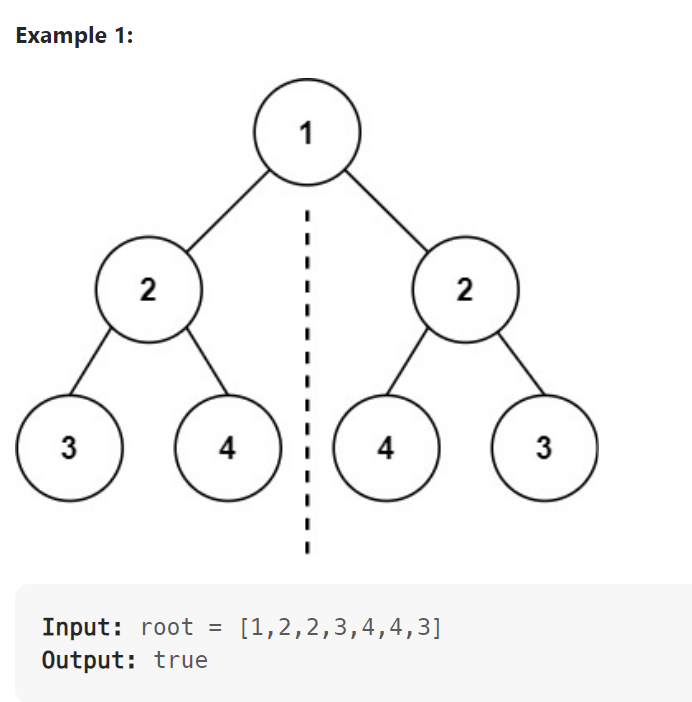

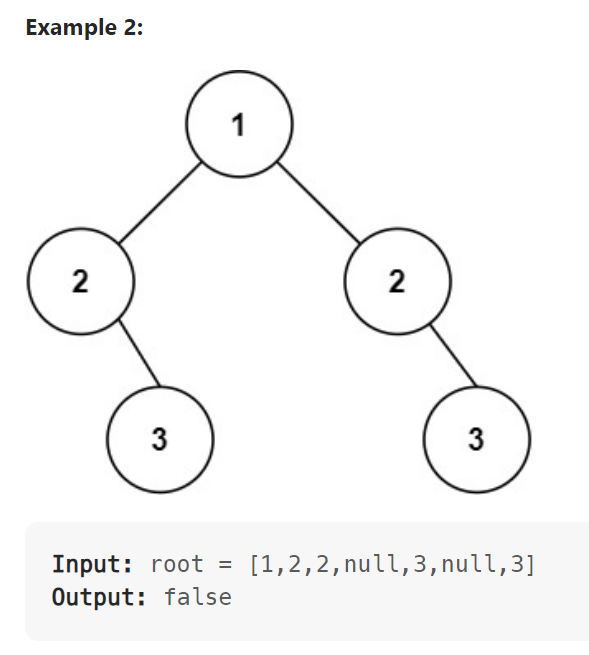

# 2.1 Recursive O(n)

In [18]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def isSymmetric(self, root):
        if root is None:
            return True
        else:
            return self.isMirror(root.left, root.right)

    def isMirror(self, left, right):
        if left is None and right is None:
            return True
        if left is None or right is None:
            return False

        if left.val == right.val:
            outPair = self.isMirror(left.left, right.right)
            inPiar = self.isMirror(left.right, right.left)
            return outPair and inPiar
        else:
            return False
        
    # traversal check
    
    def inorderTraversal(self, root):
        result = []
        self.helper(root, result)
        return result
    
    def helper(self, node, result):
        if node:
            self.helper(node.left, result)
            result.append(node.val)
            self.helper(node.right, result)
        


In [14]:
# Example binary tree
#      1
#    /   \
#   2     2
#  / \   / \
# 3   4 3   4
# should return True

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.left = TreeNode(3)
root.left.right = TreeNode(4)
root.right.left = TreeNode(4)
root.right.right = TreeNode(3)

sol = Solution()
result = print(sol.isSymmetric(root))

True


In [19]:
# Example binary tree
#      1
#    /   \
#   2     2
#    \     \
#     3     3
# should return False

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.right = TreeNode(3)
root.right.right = TreeNode(3)

sol = Solution()
result = print(sol.isSymmetric(root))
sol.inorderTraversal(root)

False


[2, 3, 1, 2, 3]

In [38]:
# practice

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def isSymmetric(self, root):
        if root is None:
            return True
        else:
            return self.isMirror(root.left, root.right)
        
    def isMirror(self, left, right):
        if left is None and right is None:
            return True
        if left is None or right is None:
            return False
        
        if left.val == right.val:
            outPair = self.isMirror(left.left, right.right)
            inPiar = self.isMirror(left.right, right.left)
            return outPair and inPiar
        else:
            return False
        
# Example binary tree
#      1
#    /   \
#   2     2
#    \     \
#     3     3
# should return False

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.right = TreeNode(3)
root.right.right = TreeNode(3)

sol = Solution()
result = print(sol.isSymmetric(root))

False


# 2.2 Iterative O(n)

In [41]:
class Solution:
    def isSymmetric(self, root):
        if root is None:
            return True
        stack = [(root.left, root.right)]
        while stack:
            left, right = stack.pop()
            if left is None and right is None:
                continue
            if left is None or right is None:
                return False
            if left.val == right.val:
                stack.append((left.left, right.right))
                stack.append((left.right, right.left))
            else:
                return False
        return True

In [43]:
# Example binary tree
#      1
#    /   \
#   2     2
#    \     \
#     3     3
# should return False

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.right = TreeNode(3)
root.right.right = TreeNode(3)

sol = Solution()
result = print(sol.isSymmetric(root))

False


In [44]:
# Example binary tree
#      1
#    /   \
#   2     2
#  / \   / \
# 3   4 3   4
# should return True

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.left = TreeNode(3)
root.left.right = TreeNode(4)
root.right.left = TreeNode(4)
root.right.right = TreeNode(3)

sol = Solution()
result = print(sol.isSymmetric(root))

True


In [3]:
# height of a tree

class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def height(root):
    # Base case: if the root is None, the height is 0
    if root is None:
        print("Reached the leaf node, returning height 0")
        return 0
    
    # Recursively calculate the height of the left and right subtrees
    print("Recursing left")
    left_height = height(root.left)
    print("Recursing right")
    right_height = height(root.right)
    
    # Return the maximum height of the left and right subtrees, plus 1 for the root node
    print(f"Calculating height of {root.val}: max({left_height}, {right_height}) + 1")
    return max(left_height, right_height) + 1

#        1
#       / \
#      2   3
#     / \
#    4   5

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

print(height(root))


Recursing left
Recursing left
Recursing left
Reached the leaf node, returning height 0
Recursing right
Reached the leaf node, returning height 0
Calculating height of 4: max(0, 0) + 1
Recursing right
Recursing left
Reached the leaf node, returning height 0
Recursing right
Reached the leaf node, returning height 0
Calculating height of 5: max(0, 0) + 1
Calculating height of 2: max(1, 1) + 1
Recursing right
Recursing left
Reached the leaf node, returning height 0
Recursing right
Reached the leaf node, returning height 0
Calculating height of 3: max(0, 0) + 1
Calculating height of 1: max(2, 1) + 1
3


# Random Questions

In [73]:
# fibonacci recursive O(2^n)

def fibonacci_sequence(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib_seq = fibonacci_sequence(n-1)
        print(f"fib_seq: {fib_seq}")
        print()
        next_number = fib_seq[-1] + fib_seq[-2]
        print(f"next_number: {next_number}")
        fib_seq.append(next_number)
        return fib_seq
    
fibonacci_sequence(5)

fib_seq: [0, 1]

next_number: 1
fib_seq: [0, 1, 1]

next_number: 2
fib_seq: [0, 1, 1, 2]

next_number: 3


[0, 1, 1, 2, 3]

In [9]:
# fibonacci recursive 2

def fibo(n):
    lst = [1, 1]
    if n >= 3:
        lst.append(fibo(n-1)+fibo(n-2))
        return lst
    else:
        return 1
        
fibo(3)    

[1, 1, 2]

In [76]:
# fibonacci iterative O(n)

def fibo(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        lst = [0, 1]
        for i in range(0,n-2):
            lst.append(lst[-1]+lst[-2])
        return lst
    
fibo(6)

[0, 1, 1, 2, 3, 5]

In [1]:
# factorial recursive

def factorial(n):
    if n == 0:
        return 1
    elif n > 0:
        return n*factorial(n-1)
        
    

In [2]:
factorial(5)

120

In [12]:
# OneNote Question: How will you find the middle element of a linked list in a single pass? 

# Define a Node class for a linked list
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# Define a LinkedList class
class LinkedList:
    def __init__(self):
        self.head = None

    # Add a new node to the linked list
    def add_node(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            last_node = self.head
            while last_node.next:
                last_node = last_node.next
            last_node.next = new_node

    # Find the middle element of the linked list
    def find_middle_element(self):
        slow_ptr = self.head
        fast_ptr = self.head
        while fast_ptr and fast_ptr.next:
            slow_ptr = slow_ptr.next
            fast_ptr = fast_ptr.next.next
        return slow_ptr.data

# Create a new linked list and add some nodes
my_list = LinkedList()
my_list.add_node(1)
my_list.add_node(2)
my_list.add_node(3)
my_list.add_node(4)
my_list.add_node(5)
#my_list.add_node(5)

# Find the middle element of the linked list and print it
middle_element = my_list.find_middle_element()
print("Middle element of the linked list:", middle_element)

Middle element of the linked list: 3


# ##################################################################

Question: Merge Two Linked Lists

You are given the heads of two sorted linked lists list1 and list2.

Merge the two lists in a one sorted list. The list should be made by splicing together the nodes of the first two lists.

Return the head of the merged linked list.

Input: list1 = [1,2,4], list2 = [1,3,4]
Output: [1,1,2,3,4,4]
Example 2:

Input: list1 = [], list2 = []
Output: []
Example 3:

Input: list1 = [], list2 = [0]
Output: [0]

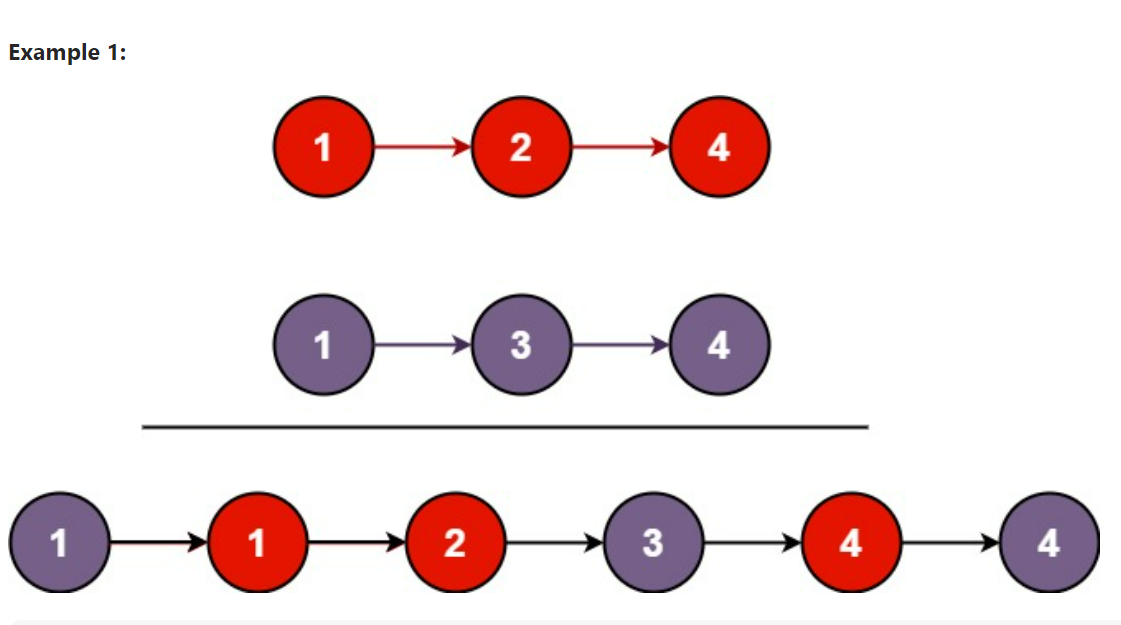

In [30]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        
    def add_node(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            last_node = self.head
            while last_node.next:
                last_node = last_node.next
            last_node.next = new_node
    
    def print_list(self):
        current_node = self.head
        while current_node is not None:
            print(current_node.data, end=" ")
            current_node = current_node.next
        print()

list1 = LinkedList()
list1.add_node(1)
list1.add_node(2)
list1.add_node(4)
list1.print_list()

list2 = LinkedList()
list2.add_node(1)
list2.add_node(3)
list2.add_node(4)
list2.print_list()

1 2 4 
1 3 4 


In [37]:
class Solution:
    def mergeTwoLists(self, list1, list2):
        # Initialize a dummy node as the head of the merged list
        dummy = Node(0)
        # Set the current node to the dummy node
        curr = dummy

        # Iterate over both input linked lists at the same time
        while list1 and list2:
            # Compare the values of the current nodes of both linked lists
            if list1.data <= list2.data:
                # Append the current node of list1 to the result list
                curr.next = list1
                # Move to the next node of list1
                list1 = list1.next
            else:
                # Append the current node of list2 to the result list
                curr.next = list2
                # Move to the next node of list2
                list2 = list2.next
            # Move the current node of the result list to the next node
            curr = curr.next

        # Append the remaining nodes of the non-empty list to the result list
        if list1:
            curr.next = list1
        else:
            curr.next = list2

        # Return the head of the merged list (skip the dummy node)
        return dummy.next

sol = Solution()
res = sol.mergeTwoLists(list1, list2)

def print_linked_list(head):
    curr = head
    while curr:
        print(curr.val, end=" ")
        curr = curr.next
    print()
    
print_linked_list(res)

AttributeError: 'LinkedList' object has no attribute 'data'

Machine Medicine coding question

A Linked List is a common data structure that stores each element as a "node" and each node will point to the next value or node in the list. The first node of a Linked List is often referred to as the head or the root.
A visual representation:
1 -> 2 -> 3 -> 4 -> 5
The value of the head node in this example is 1.

In this coding task, the Node class is given. You will use it to build out your "special linked list". The MySpecialList class 
will contain 4 functions that you will need to implement:

1. __init__(self, arr): this function initializes your special linked list. The function should take in an array and convert that array to Linked List. Although you may implement this function however you like, it might be helpful to utilize the insert function.
2. insert(self, root, item): this function takes the root of a Linked List and appends an item to the end of the Linked List. The function should return the root of the Linked List with the new item.
3. reverseList(self, head): this function takes the head of a Linked List and reverses it. The function should return the head of the reversed Linked List.
4. print_as_list(self, head): this function takes the head of Linked List and converts it into a list while preserving the order of the Linked List. This function should return the list.
Note: the initial code in the editor uses tabs for indentation. Don't mix it with spaces.


Note: the initial code in the editor uses tabs for indentation. Don't
mix it with spaces.
Three examples:

Reversal of numbers: input: [1,5,9,2,6,0] output: [0,6,2,9,5,1]
The function should be able to handle lists of any data type, including characters:
input: ["r","e","v","e","r","s","e","d"] output: ["d","e","s","r","e","v","e","r"]
If the input is just one string, the output will be that string. The node will contain the entire string as the value. Do not break strings up into characters:
input: ["reversed"] output: ["reversed"]
For this test you're using Python 3.8
Feel free to add comments in your code explaining your solution.


def reversed_list( nodes ) :



	############# DO NOT CHANGE ANYTHING BELOW #############
	my_ll = MySpecialList(nodes)
	head = my_ll.root
	reversed_head = my_ll.reverseList(head)
	return my_ll.print_as_list(reversed_head)
	############# DO NOT CHANGE ANYTHING ABOVE #############

class Node:

	def __init__(self, data):
		self.value = data
		self.next = None

class MySpecialList:

	def __init__(self, arr):
		# Given an array, initialize it into a Linked List
		# The head of the Linked List should be saved as self.head
		self.head = None

	def insert(self, root, item):
		# Given the root/head of a Linked List, appened the item to the end of the Linked List
		# Function should return the root/head of the Linked List
		pass

		return root

	def reverseList(self, head):
		# Given the head of a Linked List, reverse it and return the head of the newly reversed Linked List
		pass

		return reversed_list_head

	def print_as_list(self, head):
		# Given the head of Linked List, this function will convert it to a list while preserving the order of the Linked List
		# Return the list
		linked_list_as_list = []
		pass
		
		return linked_list_as_list

In [4]:
def reversed_list(nodes):
    ############# DO NOT CHANGE ANYTHING BELOW #############
    my_ll = MySpecialList(nodes)
    head = my_ll.head
    reversed_head = my_ll.reverseList(head)
    return my_ll.print_as_list(reversed_head)
    ############# DO NOT CHANGE ANYTHING ABOVE #############

class Node:
    def __init__(self, data):
        self.value = data
        self.next = None

class MySpecialList:
    def __init__(self, arr):
        # Given an array, initialize it into a Linked List
        # The head of the Linked List should be saved as self.head
        self.head = None
        for i in range(0,len(arr)):
            self.head = self.insert(self.head, arr[i])

    def insert(self, root, item):
        # Given the root/head of a Linked List, append the item to the end of the Linked List
        # Function should return the root/head of the Linked List
        if root is None:
            return Node(item)
        else:
            current = root
            while current.next:
                current = current.next
            current.next = Node(item)
        return root

    def reverseList_recursive(self, head):
        if head is None or head.next is None:
            return head
        new_head = self.reverseList_recursive(head.next)
        head.next.next = head
        head.next = None
                       
        return new_head

    def print_as_list(self, head):
        # Given the head of Linked List, this function will convert it to a list while preserving the order of the Linked List
        # Return the list
        linked_list_as_list = []
        current = head
        while current:
            linked_list_as_list.append(current.value)
            current = current.next
        return linked_list_as_list


In [6]:
# Create a linked list
nodes = [1, 2, 3, 4, 5]
my_list = MySpecialList(nodes)

# Reverse the linked list
reversed_head = my_list.reverseList_recursive(my_list.head)

# Print the reversed linked list as a list
reversed_list = my_list.print_as_list(reversed_head)
print(reversed_list)  # Output: [5, 4, 3, 2, 1]


[5, 4, 3, 2, 1]


In [19]:
# Create a linked list
nodes = [1, 2, 3, 4, 5]
my_list = MySpecialList(nodes)
my_list_print = my_list.print_as_list(my_list.head)
print(my_list_print)

[1, 2, 3, 4, 5]


In [2]:
# chatgpt
def reversed_list(nodes):
    ############# DO NOT CHANGE ANYTHING BELOW #############
    my_ll = MySpecialList(nodes)
    head = my_ll.root
    reversed_head = my_ll.reverseList(head)
    return my_ll.print_as_list(reversed_head)
    ############# DO NOT CHANGE ANYTHING ABOVE #############

class Node:
    def __init__(self, data):
        self.value = data
        self.next = None

class MySpecialList:
    def __init__(self, arr):
        # Given an array, initialize it into a Linked List
        # The head of the Linked List should be saved as self.root
        self.root = None
        for i in range(len(arr)):
            self.root = self.insert(self.root, arr[i])

    def insert(self, root, item):
        # Given the root/head of a Linked List, append the item to the end of the Linked List
        # Function should return the root/head of the Linked List
        if root is None:
            return Node(item)
        else:
            current = root
            while current.next is not None:
                current = current.next
            current.next = Node(item)
            return root

    def reverseList(self, head):
        # Given the head of a Linked List, reverse it and return the head of the newly reversed Linked List
        prev = None
        current = head
        while current is not None:
            next_node = current.next
            current.next = prev
            prev = current
            current = next_node
        return prev

    def print_as_list(self, head):
        # Given the head of Linked List, this function will convert it to a list while preserving the order of the Linked List
        # Return the list
        linked_list_as_list = []
        current = head
        while current is not None:
            linked_list_as_list.append(current.value)
            current = current.next
        return linked_list_as_list


In [3]:
# Create a linked list
nodes = [1, 2, 3, 4, 5]
my_list = MySpecialList(nodes)

# Reverse the linked list
reversed_head = my_list.reverseList(my_list.root)

# Print the reversed linked list as a list
reversed_list = my_list.print_as_list(reversed_head)
print(reversed_list)  # Output: [5, 4, 3, 2, 1]


[5, 4, 3, 2, 1]


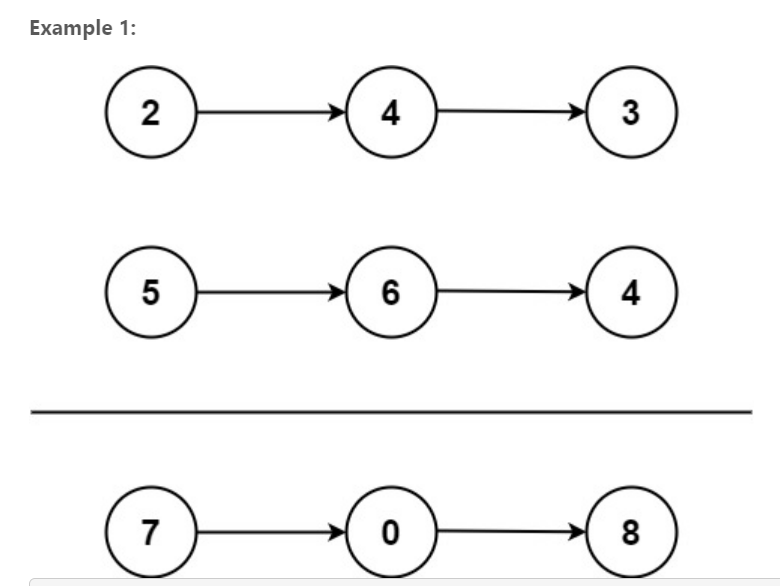

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.



Example 1:


Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.
Example 2:

Input: l1 = [0], l2 = [0]
Output: [0]
Example 3:

Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]

In [ ]:
# leetcode solution

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        res = ListNode(0)
        curr = res
        carry = 0
        
        while l1 and l2:
            total = l1.val + l2.val + carry
            result = total % 10
            carry = total // 10
            
            curr.next = ListNode(result % 10)
            curr = curr.next
            
            l1 = l1.next
            l2 = l2.next
            
        while l1:
            curr.next = ListNode((l1.val + carry) % 10)
            curr = curr.next
            carry = (l1.val + carry) // 10
            l1 = l1.next
            
        while l2:
            curr.next = ListNode((l2.val + carry) % 10)
            curr = curr.next
            carry = (l2.val + carry) // 10
            l2 = l2.next
       
        if carry:
            curr.next = ListNode((carry))
        
        return res.next

# ##################################################################

Question: Valid Parantheses

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.
 

Example 1:

Input: s = "()"
Output: true
Example 2:

Input: s = "()[]{}"
Output: true
Example 3:

Input: s = "(]"
Output: false

In [21]:
def isValid(s):
    stack = []
    for ch in s:
        if ch in ['(','[','{']:
            stack.append(ch)
        else:
            if not stack:
                return False
            if ch == ')' and stack[-1] == '(':
                stack.pop()
            elif ch == ']' and stack[-1] == '[':
                stack.pop()
            elif ch == '}' and stack[-1] == '{':
                stack.pop()
            else:
                return False
    
    return not stack
    #By using return not stack at the end of the function, we are essentially saying "return True if the stack is empty, and False otherwise".
    
    
print(isValid("()[]"))
print(isValid("([])"))
print(isValid("{}()[]"))
print(isValid("())[]"))
print(isValid(""))

True
True
True
False
True


# ##################################################################

Question: Pascal's Triangle

Given an integer numRows, return the first numRows of Pascal's triangle.

In Pascal's triangle, each number is the sum of the two numbers directly above it as shown:


 

Example 1:

Input: numRows = 5
Output: [[1],[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1]]
Example 2:

Input: numRows = 1
Output: [[1]]

In [46]:
# iterative O(n**2)
def generate(numRows):
    pascal = [[1]*(i+1) for i in range(numRows)]
    for i in range(numRows):
        for j in range(1,i):
            pascal[i][j] = pascal[i-1][j-1] + pascal[i-1][j]
    return pascal

generate(5)

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

In [49]:
pascal = [[1]*(i+1) for i in range(5)]
pascal

[[1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1]]

In [55]:
# recursive O(n**2)
def generate_pascal(numRows):
    # Base case: Return the first two rows of Pascal's Triangle
    if numRows == 0:
        return []
    elif numRows == 1:
        return [[1]]
    elif numRows == 2:
        return [[1], [1, 1]]

    # Recursive case: Calculate the current row of Pascal's Triangle
    prev_rows = generate_pascal(numRows - 1)
    prev_row = prev_rows[-1]
    row = [1] + [prev_row[i] + prev_row[i+1] for i in range(numRows-2)] + [1]
    prev_rows.append(row)

    return prev_rows

generate_pascal(5)

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

# ##################################################################

Question: Single Number

Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.

You must implement a solution with a linear runtime complexity and use only constant extra space.

Example 1:

Input: nums = [2,2,1]
Output: 1
Example 2:

Input: nums = [4,1,2,1,2]
Output: 4
Example 3:

Input: nums = [1]
Output: 1

In [58]:
# xor operator, 1 xor 2 xor 3 xor 1 xor 2 xor 3 xor 4 = (1 xor 1) xor (2 xor 2) xor (3 xor 3) xor 4
# = 0 xor 0 xor 0 xor 4
# = 4
# in short words, it returns the single one as a result of multiple xor operations
class Solution:
    def singleNumber(self, nums):
        xor = 0
        for num in nums:
            xor ^= num
        
        return xor

lst = [4,1,2,1,2]
sol = Solution()
print(sol.singleNumber(lst))

4


In [65]:
# hash table
def singleNumber(nums):
    hash_table = {}
    # iterate through all the numbers and update the hash table
    for num in nums:
        if num in hash_table:
            hash_table[num] += 1
        else:
            hash_table[num] = 1
    # iterate through the hash table and return the number with frequency 1
    for key in hash_table:
        if hash_table[key] == 1:
            return key
        
singleNumber(lst)

4

# ##################################################################

Best Time to Buy and Sell Stock

Easy
24.2K
756

Companies
You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

Example 2:

Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.

In [11]:
def best_profit(prices):
    if len(prices) < 2:
        return 0
    
    buy = prices[0]
    max_profit = 0
    for i in range(1,len(prices)):
        if prices[i] < buy:
            buy = prices[i]
        else:
            max_profit = max(max_profit, prices[i] - buy)
        print(f"Buy: {buy}, Sell: {prices[i]}, Profit: {prices[i] - buy}")
    return max_profit
    
print(best_profit([7,1,5,3,6,4]))
# 5
print(best_profit([7,6,4,3,1]))
# 0

Buy: 1, Sell: 1, Profit: 0
Buy: 1, Sell: 5, Profit: 4
Buy: 1, Sell: 3, Profit: 2
Buy: 1, Sell: 6, Profit: 5
Buy: 1, Sell: 4, Profit: 3
5
Buy: 6, Sell: 6, Profit: 0
Buy: 4, Sell: 4, Profit: 0
Buy: 3, Sell: 3, Profit: 0
Buy: 1, Sell: 1, Profit: 0
0


In [9]:
def best_profit(prices):
    if len(prices) < 2:
        return 0
    
    buy = prices[0]
    max_profit = 0
    for i in range(1,len(prices)):
        if prices[i] < buy:
            buy = prices[i]
        else:
            profit = prices[i] - buy
            if profit > max_profit:
                max_profit = profit
            print(f"Buy: {buy}, Sell: {prices[i]}, Profit: {profit}")
        
    return max_profit

print(best_profit([7,1,5,3,6,4]))
# 5
print(best_profit([7,6,4,3,1]))
# 0

Buy: 1, Sell: 5, Profit: 4
Buy: 1, Sell: 3, Profit: 2
Buy: 1, Sell: 6, Profit: 5
Buy: 1, Sell: 4, Profit: 3
5
0


# ##################################################################

169. Majority Element

Easy
14K
434
Companies
Given an array nums of size n, return the majority element.

The majority element is the element that appears more than ⌊n / 2⌋ times. You may assume that the majority element always exists in the array.

 

Example 1:

Input: nums = [3,2,3]
Output: 3

Example 2:

Input: nums = [2,2,1,1,1,2,2]
Output: 2

In [5]:
# time: O(n), space: O(1)

def majorityElement(nums):
    count = 0
    candidate = None

    for num in nums:
        if count == 0:
            candidate = num
        if num == candidate:
            count += 1
        else:
            count -= 1
        #count += 1 if num == candidate else -1

    return candidate

nums = [2,2,1,1,1,2,2]
print(majorityElement(nums))

2


In [3]:
def majorityElement(nums):
    count = 0
    candidate = None

    for num in nums:
        print("Current number:", num)
        print("Current candidate:", candidate)
        print("Current count:", count)
        
        if count == 0:
            candidate = num
        if num == candidate:
            count += 1
        else:
            count -= 1
        
        print("Updated count:", count)
        print("Updated candidate:", candidate)
        print()
        
    return candidate
        
nums = [2,2,1,1,1,2,2]
print(majorityElement(nums))

Current number: 2
Current candidate: None
Current count: 0
Updated count: 1
Updated candidate: 2

Current number: 2
Current candidate: 2
Current count: 1
Updated count: 2
Updated candidate: 2

Current number: 1
Current candidate: 2
Current count: 2
Updated count: 1
Updated candidate: 2

Current number: 1
Current candidate: 2
Current count: 1
Updated count: 0
Updated candidate: 2

Current number: 1
Current candidate: 2
Current count: 0
Updated count: 1
Updated candidate: 1

Current number: 2
Current candidate: 1
Current count: 1
Updated count: 0
Updated candidate: 1

Current number: 2
Current candidate: 1
Current count: 0
Updated count: 1
Updated candidate: 2

2


# ##################################################################

# Python postgres connection from docker 5433:5432

In [9]:
import psycopg2

conn = psycopg2.connect(
    host="10.0.0.68", # or localhost
    database="ali_db",
    user="postgres",
    password="mysecretpassword",
    port="5433"
)

cursor = conn.cursor()
cursor.execute("SELECT * FROM ahmet_table")
rows = cursor.fetchall()
rows

[('10', 'deneme'), ('123', 'deneme2')]

In [11]:
# top k top frequent element, time complexity: O(N) + O(k log N)

def kth_frequent(arr, k):
    if arr is None:
        return "input should be other than None"
    
    import heapq
    
    counter = {x:arr.count(x) for x in arr}
    print("counter: ", counter)
    
    heap = [(-freq, item) for item, freq in counter.items()]
    heapq.heapify(heap)
    print("heap: ", heap)
    
    res = []
    for i in range(k):
        freq, num = heapq.heappop(heap)
        print("heap: ", heap)
        res.append(num)
        
    print("res: ", res)
    return res

arr = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
k = 2
print(kth_frequent(arr, k))

arr = ['a', 'b', 'b', 'c', 'c', 'c', 'c']
k = 1
print(kth_frequent(arr, k))

    

counter:  {1: 1, 2: 2, 3: 3, 4: 4}
heap:  [(-4, 4), (-2, 2), (-3, 3), (-1, 1)]
heap:  [(-3, 3), (-2, 2), (-1, 1)]
heap:  [(-2, 2), (-1, 1)]
res:  [4, 3]
[4, 3]
counter:  {'a': 1, 'b': 2, 'c': 4}
heap:  [(-4, 'c'), (-2, 'b'), (-1, 'a')]
heap:  [(-2, 'b'), (-1, 'a')]
res:  ['c']
['c']


Let's analyze the time complexity of the kth_frequent function:

Counting the frequency of each element in the array (using a dictionary): O(N), where N is the length of the input array.
Creating a list of tuples with the negative frequency and the corresponding element: O(M), where M is the number of unique elements in the array.

The heapify operation on the heap of size M: O(M).

The loop that iterates k times, and each iteration includes a heappop operation that takes O(log M) time: O(k log M).

The overall time complexity of the kth_frequent function would be O(N) + O(M) + O(M) + O(k log M). The dominating term depends on the values of N, M, and k. In the worst case, M = N (all elements are unique), so the time complexity would be O(N) + O(k log N).

The space complexity is O(N) as we create a dictionary to store the frequency count of each element and a heap of size M. In the worst case, M = N, making the space complexity O(N).

In [25]:
# merge sort, time complexity: O(nlogn), space complexity: O(n)

def merge_sort(arr):
    # If the array has length 1 or less, it is already sorted
    if len(arr) <= 1:
        return arr
    
    # Split the array into two halves
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    # Recursively sort the two halves
    left_sorted = merge_sort(left)
    right_sorted = merge_sort(right)
    
    # Merge the two sorted halves
    merged = []
    i = j = 0
    while i < len(left_sorted) and j < len(right_sorted):
        if left_sorted[i] <= right_sorted[j]:
            merged.append(left_sorted[i])
            i += 1
        else:
            merged.append(right_sorted[j])
            j += 1
    
    # Add any remaining elements from the left or right half
    merged += left_sorted[i:]
    merged += right_sorted[j:]
    
    return merged

arr = [3, 5, 2, 7, 1, 8, 4, 6]
sorted_arr = merge_sort(arr)
print(sorted_arr)  # output: [1, 2, 3, 4, 5, 6, 7, 8]


[1, 2, 3, 4, 5, 6, 7, 8]


In [2]:
# practice

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    left_sorted = merge_sort(left)
    right_sorted = merge_sort(right)
    
    merged = []
    i = j = 0
    while i < len(left_sorted) and j < len(right_sorted):
        if left_sorted[i] <= right_sorted[j]:
            merged.append(left_sorted[i])
            i += 1
        else:
            merged.append(right_sorted[j])
            j += 1
            
    merged += left_sorted[i:]
    merged += right_sorted[j:]
    
    return merged

arr = [3, 5, 2, 7, 1, 8, 4, 6]
sorted_arr = merge_sort(arr)
print(sorted_arr)  # output: [1, 2, 3, 4, 5, 6, 7, 8]

[1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
# binary search practice

def bs_target(arr, target):
    l = 0
    r = len(arr)-1
    
    while l <= r:
        mid = (r+l) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            l = mid + 1
        else:
            r = mid - 1
    
    return -1

arr = [1, 3, 5, 7, 9]
target = 7

print(bs_target(arr, target))

3


In [4]:
# BFS - Breadth First Search

from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def bfs(self, start):
        visited = set()  # To keep track of visited nodes
        queue = deque([start])  # Initialize the queue with the starting node

        while queue:
            node = queue.popleft()  # Dequeue the next node to explore
            if node not in visited:
                print(node, end=" ")  # Process the node (e.g., print it)
                visited.add(node)  # Mark the node as visited
                queue.extend(neighbor for neighbor in self.graph[node] if neighbor not in visited)

g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)
g.add_edge(2, 6)

print("Breadth-First Search starting from node 0:")
g.bfs(0)

Breadth-First Search starting from node 0:
0 1 2 3 4 5 6 

In [3]:
# BFS

from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def bfs(self, start):
        visited = set()  # To keep track of visited nodes
        queue = deque([start])  # Initialize the queue with the starting node

        while queue:
            print(f"Current queue: {queue}")
            node = queue.popleft()  # Dequeue the next node to explore
            if node not in visited:
                print(f"Processing node: {node}")
                visited.add(node)  # Mark the node as visited
                neighbors = [neighbor for neighbor in self.graph[node] if neighbor not in visited]
                print(f"Unvisited neighbors of node {node}: {neighbors}")
                queue.extend(neighbors)
            print(f"Visited nodes: {visited}\n")

g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)
g.add_edge(2, 6)

#     0
#    / \
#   1   2
#  / \ / \
# 3  4 5  6


print("Breadth-First Search starting from node 0:")
g.bfs(0)


Breadth-First Search starting from node 0:
Current queue: deque([0])
Processing node: 0
Unvisited neighbors of node 0: [1, 2]
Visited nodes: {0}

Current queue: deque([1, 2])
Processing node: 1
Unvisited neighbors of node 1: [3, 4]
Visited nodes: {0, 1}

Current queue: deque([2, 3, 4])
Processing node: 2
Unvisited neighbors of node 2: [5, 6]
Visited nodes: {0, 1, 2}

Current queue: deque([3, 4, 5, 6])
Processing node: 3
Unvisited neighbors of node 3: []
Visited nodes: {0, 1, 2, 3}

Current queue: deque([4, 5, 6])
Processing node: 4
Unvisited neighbors of node 4: []
Visited nodes: {0, 1, 2, 3, 4}

Current queue: deque([5, 6])
Processing node: 5
Unvisited neighbors of node 5: []
Visited nodes: {0, 1, 2, 3, 4, 5}

Current queue: deque([6])
Processing node: 6
Unvisited neighbors of node 6: []
Visited nodes: {0, 1, 2, 3, 4, 5, 6}



In [6]:
# BFS - solve a maze (BFS is more suitable for shortest path)
# In summary, BFS is generally more suitable for finding the shortest path in an unweighted graph, 
# while DFS is typically more memory-efficient but may not find the shortest path. 
# However, both methods can be used to solve a maze.

# time complexity: O(N * M), where N is the number of rows and M is the number of columns in the maze.
# space complexity: O(N * M), where N is the number of rows and M is the number of columns in the maze.

from collections import deque

def is_valid_move(maze, x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == " "

def solve_maze(maze, start, end):
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
    visited = set()
    queue = deque([(start, [])])

    while queue:
        print("while iteration start:")
        
        (x, y), path = queue.popleft()
        print(f"Current position: ({x}, {y}), path: {path}")
        
        if (x, y) not in visited:
            visited.add((x, y))
            if (x, y) == end:
                return path

            for dx, dy in moves:
                new_x, new_y = x + dx, y + dy
                if is_valid_move(maze, new_x, new_y):
                    queue.append(((new_x, new_y), path + [(new_x, new_y)]))
                    print(f"  Appending ({new_x}, {new_y}) to the queue")
        
        print("while iteration end")
        print()

    return None

maze = [
    ["#", "#", "#", "#", "#", "#", "#", "#", "#"],
    ["#", "S", " ", " ", " ", " ", "#", " ", "#"],
    ["#", " ", "#", " ", "#", " ", "#", " ", "#"],
    ["#", " ", "#", " ", "#", " ", " ", " ", "#"],
    ["#", " ", " ", " ", " ", "#", "#", " ", "#"],
    ["#", " ", "#", " ", " ", " ", "#", " ", "#"],
    ["#", " ", "#", "#", "#", " ", "#", " ", "#"],
    ["#", " ", " ", " ", " ", " ", " ", " ", "E"],
    ["#", "#", "#", "#", "#", "#", "#", "#", "#"]
]

start = (1, 1)
end = (7, 8)

path = solve_maze(maze, start, end)
print("Path to the exit:", path)


while iteration start:
Current position: (1, 1), path: []
  Appending (1, 2) to the queue
  Appending (2, 1) to the queue
while iteration end

while iteration start:
Current position: (1, 2), path: [(1, 2)]
  Appending (1, 3) to the queue
while iteration end

while iteration start:
Current position: (2, 1), path: [(2, 1)]
  Appending (3, 1) to the queue
while iteration end

while iteration start:
Current position: (1, 3), path: [(1, 2), (1, 3)]
  Appending (1, 4) to the queue
  Appending (2, 3) to the queue
  Appending (1, 2) to the queue
while iteration end

while iteration start:
Current position: (3, 1), path: [(2, 1), (3, 1)]
  Appending (4, 1) to the queue
  Appending (2, 1) to the queue
while iteration end

while iteration start:
Current position: (1, 4), path: [(1, 2), (1, 3), (1, 4)]
  Appending (1, 5) to the queue
  Appending (1, 3) to the queue
while iteration end

while iteration start:
Current position: (2, 3), path: [(1, 2), (1, 3), (2, 3)]
  Appending (3, 3) to the queue


In [1]:
# roman to int

class Solution:
    def romanToInt(self, s):
        dic = {
            "I":1,
            "V":5,
            "X":10,
            "L":50,
            "C":100,
            "D":500,
            "M":1000
        }
        lst = list(s)
        res = 0
        for i in range(0,len(lst)-1):
            if dic[lst[i]] < dic[lst[i+1]]:
                res -= dic[lst[i]]
            else:
                res += dic[lst[i]]
        res += dic[lst[-1]]
        return res


o1 = Solution()
print(o1.romanToInt("IV"))
print(o1.romanToInt("IM"))
print(o1.romanToInt("MDC"))

4
4
1600


In [13]:
# int to roman

class Solution:
    def intToRoman(self, num: int) -> str:
        dic = {
            1000: "M",
            900: "CM",
            500: "D",
            400: "CD",
            100: "C",
            90: "XC",
            50: "L",
            40: "XL",
            10: "X",
            9: "IX",
            5: "V",
            4: "IV",
            1: "I"
        }
        res = ""
        for val, roman in dic.items():
            while num >= val:
                res += roman
                num -= val
        return res

solution = Solution()
print(solution.intToRoman(123)) # prints "CXXIII"

CXXIII


In [38]:
# proxify last interview coding question

'''  

You are a developer for a university. Your current project is to develop a system for students to find courses they share with friends. The university has a system for querying courses students are enrolled in, returned as a list of (ID, course) pairs.

Write a function that takes in a collection of (student ID number, course name) pairs and returns, for every pair of students, a collection of all courses they share.


Sample Input:

enrollments1 = [
  ["58", "Linear Algebra"],
  ["94", "Art History"],
  ["94", "Operating Systems"],
  ["17", "Software Design"],
  ["58", "Mechanics"],
  ["58", "Economics"],
  ["17", "Linear Algebra"],
  ["17", "Political Science"],
  ["94", "Economics"],
  ["25", "Economics"],
  ["58", "Software Design"],
]

Sample Output (pseudocode, in any order):

find_pairs(enrollments1) =>
{
  "58,17": ["Software Design", "Linear Algebra"]
  "58,94": ["Economics"]
  "58,25": ["Economics"]
  "94,25": ["Economics"]
  "17,94": []
  "17,25": []
}



Additional test cases:

Sample Input:

enrollments2 = [
  ["0", "Advanced Mechanics"],
  ["0", "Art History"],
  ["1", "Course 1"],
  ["1", "Course 2"],
  ["2", "Computer Architecture"],
  ["3", "Course 1"],
  ["3", "Course 2"],
  ["4", "Algorithms"]
]



Sample output:

find_pairs(enrollments2) =>
{
  "1,0":[]
  "2,0":[]
  "2,1":[]
  "3,0":[]
  "3,1":["Course 1", "Course 2"]
  "3,2":[]
  "4,0":[]
  "4,1":[]
  "4,2":[]
  "4,3":[]
} 

Sample Input:
enrollments3 = [
  ["23", "Software Design"], 
  ["3", "Advanced Mechanics"], 
  ["2", "Art History"], 
  ["33", "Another"],
]


Sample output:

find_pairs(enrollments3) =>
{
  "23,3": []
  "23,2": []
  "23,33":[]
  "3,2":  []
  "3,33": []
  "2,33": []
}

All Test Cases:
find_pairs(enrollments1)
find_pairs(enrollments2)
find_pairs(enrollments3)

Complexity analysis variables:

n: number of student,course pairs in the input
s: number of students
c: total number of courses being offered (note: The number of courses any student can take is bounded by a small constant)

'''

enrollments1 = [
  ["58", "Linear Algebra"],
  ["94", "Art History"],
  ["94", "Operating Systems"],
  ["17", "Software Design"],
  ["58", "Mechanics"],
  ["58", "Economics"],
  ["17", "Linear Algebra"],
  ["17", "Political Science"],
  ["94", "Economics"],
  ["25", "Economics"],
  ["58", "Software Design"],
]

enrollments2 = [
  ["0", "Advanced Mechanics"],
  ["0", "Art History"],
  ["1", "Course 1"],
  ["1", "Course 2"],
  ["2", "Computer Architecture"],
  ["3", "Course 1"],
  ["3", "Course 2"],
  ["4", "Algorithms"],
]

enrollments3 = [
  ["23", "Software Design"], 
  ["3", "Advanced Mechanics"], 
  ["2", "Art History"], 
  ["33", "Another"],
]

In [25]:
# own trial, do it again

import pandas as pd

def find_pairs(enrollments):
    df = pd.DataFrame(enrollments)
    df = df.rename(columns={0: 'Ids'})
    df = df.rename(columns={1: 'Classes'})
    df_grouped = df.groupby("Ids")["Classes"].agg(list).reset_index()
    
    #import itertools
    #combinations = list(itertools.combinations(my_list, 2))
    
    res = {}
    for i in range(len(df_grouped["Ids"])):
        for j in range(i+1,len(df_grouped["Ids"])):
            res[df_grouped["Ids"][i], df_grouped["Ids"][j]] = list(set(df_grouped.loc[df_grouped["Ids"] == df_grouped["Ids"][i], "Classes"]) & set(df_grouped.loc[df_grouped["Ids"] == df_grouped["Ids"][j], "Classes"]))
    
    print(df_grouped.columns)
    print(df_grouped)
    print(res)
    
    return res

print(find_pairs(enrollments1))

TypeError: unhashable type: 'list'

In [55]:
# gpt4

from collections import defaultdict
from itertools import combinations

def find_pairs(enrollments):
    # Create a dictionary to store courses for each student
    student_courses = defaultdict(set)

    for student, course in enrollments:
        student_courses[student].add(course)

    # Find all pairs of students
    student_pairs = combinations(student_courses.keys(), 2)
    
    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs and find shared courses
    for student1, student2 in student_pairs:
        shared_courses[f"{student1},{student2}"] = list(student_courses[student1] & student_courses[student2])

    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))
#find_pairs(enrollments1) =>
#{
#  "58,17": ["Software Design", "Linear Algebra"]
#  "58,94": ["Economics"]
#  "58,25": ["Economics"]
#  "94,25": ["Economics"]
#  "17,94": []
#  "17,25": []
#}

#print(find_pairs(enrollments2))
#print(find_pairs(enrollments3))


{'58,17': ['Software Design', 'Linear Algebra'], '58,94': ['Economics'], '58,25': ['Economics'], '17,94': [], '17,25': [], '94,25': ['Economics']}


In [56]:
# defaultdict(set) --> defaultdict(list) modification

from collections import defaultdict
from itertools import combinations

def find_pairs(enrollments):
    # Create a dictionary to store courses for each student
    student_courses = defaultdict(list)

    for student, course in enrollments:
        student_courses[student].append(course)
        
    print("Student courses:", student_courses)

    # Find all pairs of students
    student_pairs = list(combinations(student_courses.keys(), 2))
    
    print("Student pairs:", list(student_pairs))

    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs and find shared courses
    for student1, student2 in student_pairs:
        shared_courses[f"{student1},{student2}"] = list(set(student_courses[student1]) & set(student_courses[student2]))
        
    print("Shared courses:", shared_courses)

    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))
#find_pairs(enrollments1) =>
#{
#  "58,17": ["Software Design", "Linear Algebra"]
#  "58,94": ["Economics"]
#  "58,25": ["Economics"]
#  "94,25": ["Economics"]
#  "17,94": []
#  "17,25": []
#}

#print(find_pairs(enrollments2))
#print(find_pairs(enrollments3))


Student courses: defaultdict(<class 'list'>, {58: ['Economics', 'Software Design', 'Linear Algebra'], 17: ['Software Design', 'Linear Algebra'], 94: ['Economics'], 25: ['Economics']})
Student pairs: [(58, 17), (58, 94), (58, 25), (17, 94), (17, 25), (94, 25)]
Shared courses: {'58,17': ['Software Design', 'Linear Algebra'], '58,94': ['Economics'], '58,25': ['Economics'], '17,94': [], '17,25': [], '94,25': ['Economics']}
{'58,17': ['Software Design', 'Linear Algebra'], '58,94': ['Economics'], '58,25': ['Economics'], '17,94': [], '17,25': [], '94,25': ['Economics']}


In [57]:
# defaultdict(set) --> defaultdict(list) modification
# error: iterator exhaustion at student_pairs = combinations(student_courses.keys(), 2) thats why returns empty list

from collections import defaultdict
from itertools import combinations

def find_pairs(enrollments):
    # Create a dictionary to store courses for each student
    student_courses = defaultdict(list)

    for student, course in enrollments:
        student_courses[student].append(course)
        
    print("Student courses:", student_courses)

    # Find all pairs of student
    student_pairs = combinations(student_courses.keys(), 2)
    
    print("Student pairs:", list(student_pairs))

    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs and find shared courses
    for student1, student2 in student_pairs:
        shared_courses[f"{student1},{student2}"] = list(set(student_courses[student1]) & set(student_courses[student2]))
        
    print("Shared courses:", shared_courses)

    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))
#find_pairs(enrollments1) =>
#{
#  "58,17": ["Software Design", "Linear Algebra"]
#  "58,94": ["Economics"]
#  "58,25": ["Economics"]
#  "94,25": ["Economics"]
#  "17,94": []
#  "17,25": []
#}

#print(find_pairs(enrollments2))
#print(find_pairs(enrollments3))


Student courses: defaultdict(<class 'list'>, {58: ['Economics', 'Software Design', 'Linear Algebra'], 17: ['Software Design', 'Linear Algebra'], 94: ['Economics'], 25: ['Economics']})
Student pairs: [(58, 17), (58, 94), (58, 25), (17, 94), (17, 25), (94, 25)]
Shared courses: {}
{}


In [58]:
from collections import defaultdict
from itertools import combinations

def find_pairs(enrollments):
    # Create a dictionary to store courses for each student
    student_courses = defaultdict(list)

    for student, course in enrollments:
        student_courses[student].append(course)

    # Find all pairs of students
    student_pairs = combinations(student_courses.keys(), 2)

    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs and find shared courses
    for student1, student2 in student_pairs:
        shared_courses[f"{student1},{student2}"] = list(set(student_courses[student1]) & set(student_courses[student2]))

    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))


{'58,17': ['Software Design', 'Linear Algebra'], '58,94': ['Economics'], '58,25': ['Economics'], '17,94': [], '17,25': [], '94,25': ['Economics']}


In [63]:
# df implementation
from itertools import combinations
import pandas as pd

def find_pairs(enrollments):
    # Create a DataFrame with the enrollment data
    df = pd.DataFrame(enrollments, columns=["Ids", "Classes"])
    
    # Group by student ID and aggregate their classes into a list
    df_grouped = df.groupby("Ids")["Classes"].agg(list)
    
    print(df_grouped)

    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs of students and find shared courses
    for pair in combinations(df_grouped.index, 2):
        courses1 = set(df_grouped.loc[pair[0]])
        courses2 = set(df_grouped.loc[pair[1]])
        shared = list(courses1 & courses2)
        shared_courses[f"{pair[0]},{pair[1]}"] = shared

    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))
#print(find_pairs(enrollments2))
#print(find_pairs(enrollments3))


Ids
17               [Software Design, Linear Algebra]
25                                     [Economics]
58    [Economics, Software Design, Linear Algebra]
94                                     [Economics]
Name: Classes, dtype: object
{'17,25': [], '17,58': ['Software Design', 'Linear Algebra'], '17,94': [], '25,58': ['Economics'], '25,94': ['Economics'], '58,94': ['Economics']}


In [69]:
# df implementation
from itertools import combinations
import pandas as pd

def find_pairs(enrollments):
    # Create a DataFrame with the enrollment data
    df = pd.DataFrame(enrollments, columns=["Ids", "Classes"])
    
    # Group by student ID and aggregate their classes into a list
    df_grouped = df.groupby("Ids")["Classes"].agg(list)
    
    print(df_grouped)
    print()

    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs of students and find shared courses
    for pair in combinations(df_grouped.index, 2):
        courses1 = set(df_grouped.loc[pair[0]])
        print("set(df_grouped.loc[pair[0]]): ", courses1)
        
        courses2 = set(df_grouped.loc[pair[1]])
        print("set(df_grouped.loc[pair[1]]): ", courses2)
        
        shared = list(courses1 & courses2)
        print("list(courses1 & courses2): ", shared)
        
        shared_courses[f"{pair[0]},{pair[1]}"] = shared
        print(shared_courses[f"{pair[0]},{pair[1]}"])
        print()
    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))
#print(find_pairs(enrollments2))
#print(find_pairs(enrollments3))


Ids
17               [Software Design, Linear Algebra]
25                                     [Economics]
58    [Economics, Software Design, Linear Algebra]
94                                     [Economics]
Name: Classes, dtype: object

set(df_grouped.loc[pair[0]]):  {'Software Design', 'Linear Algebra'}
set(df_grouped.loc[pair[1]]):  {'Economics'}
list(courses1 & courses2):  []
[]

set(df_grouped.loc[pair[0]]):  {'Software Design', 'Linear Algebra'}
set(df_grouped.loc[pair[1]]):  {'Software Design', 'Economics', 'Linear Algebra'}
list(courses1 & courses2):  ['Software Design', 'Linear Algebra']
['Software Design', 'Linear Algebra']

set(df_grouped.loc[pair[0]]):  {'Software Design', 'Linear Algebra'}
set(df_grouped.loc[pair[1]]):  {'Economics'}
list(courses1 & courses2):  []
[]

set(df_grouped.loc[pair[0]]):  {'Economics'}
set(df_grouped.loc[pair[1]]):  {'Software Design', 'Economics', 'Linear Algebra'}
list(courses1 & courses2):  ['Economics']
['Economics']

set(df_grouped.loc[pair[

In [56]:
from itertools import combinations
import pandas as pd

def find_pairs(enrollments):
    # Create a DataFrame with the enrollment data
    df = pd.DataFrame(enrollments, columns=["Ids", "Classes"])
    
    # Group by student ID and aggregate their classes into a list
    df_grouped = df.groupby("Ids")["Classes"].agg(list)
    
    print("Student courses:\n", df_grouped)

    # Initialize a dictionary to store shared courses for each pair
    shared_courses = {}

    # Iterate through all pairs of students and find shared courses
    for pair in combinations(df_grouped.index, 2):
        courses1 = set(df_grouped.loc[pair[0]])
        courses2 = set(df_grouped.loc[pair[1]])
        shared = list(courses1 & courses2)
        shared_courses[f"{pair[0]},{pair[1]}"] = shared

        print(f"Pair: {pair[0]}, {pair[1]}\nCourses 1: {courses1}\nCourses 2: {courses2}\nShared: {shared}\n")
        
    print("Shared courses:\n", shared_courses)

    return shared_courses

# Test the function with the given test cases
print(find_pairs(enrollments1))
#print(find_pairs(enrollments2))
#print(find_pairs(enrollments3))


Student courses:
 Ids
17    [Software Design, Linear Algebra, Political Sc...
25                                          [Economics]
58    [Linear Algebra, Mechanics, Economics, Softwar...
94          [Art History, Operating Systems, Economics]
Name: Classes, dtype: object
{'Software Design', 'Linear Algebra', 'Political Science'}
Pair: 17, 25
Courses 1: {'Software Design', 'Linear Algebra', 'Political Science'}
Courses 2: {'Economics'}
Shared: []

{'Software Design', 'Linear Algebra', 'Political Science'}
Pair: 17, 58
Courses 1: {'Software Design', 'Linear Algebra', 'Political Science'}
Courses 2: {'Software Design', 'Mechanics', 'Linear Algebra', 'Economics'}
Shared: ['Software Design', 'Linear Algebra']

{'Software Design', 'Linear Algebra', 'Political Science'}
Pair: 17, 94
Courses 1: {'Software Design', 'Linear Algebra', 'Political Science'}
Courses 2: {'Art History', 'Economics', 'Operating Systems'}
Shared: []

{'Economics'}
Pair: 25, 58
Courses 1: {'Economics'}
Courses 2: {'So

In [75]:
# practice

enrollments1 = [
  ["58", "Linear Algebra"],
  ["94", "Art History"],
  ["94", "Operating Systems"],
  ["17", "Software Design"],
  ["58", "Mechanics"],
  ["58", "Economics"],
  ["17", "Linear Algebra"],
  ["17", "Political Science"],
  ["94", "Economics"],
  ["25", "Economics"],
  ["58", "Software Design"],
]

#Sample Output (pseudocode, in any order):

# find_pairs(enrollments1) =>
# {
#  "58,17": ["Software Design", "Linear Algebra"]
#  "58,94": ["Economics"]
#  "58,25": ["Economics"]
#  "94,25": ["Economics"]
#  "17,94": []
#  "17,25": []
# }

from collections import defaultdict
import pandas as pd

def find_pairs(enrollment):
    ids = list(set([item[0] for item in enrollment]))
    print(ids)
    
    combinations = []
    for i in range(len(ids)):
        for j in range(i+1,len(ids)):
            combinations.append((ids[i], ids[j]))
    print(combinations)

    clusters = defaultdict(list)
    for ids, classes in enrollment:
        clusters[ids].append(classes)
    print(clusters)
    
    res = {}
    for item in combinations:
        res[f"{item[0]}, {item[1]}"] = list(set(clusters[item[0]]) & set(clusters[item[1]]))
    print(res)
    
    #df_res = pd.Series(res)
    df_res = pd.DataFrame(res.items(), columns=["Ids", "Classes"])
    print(df_res)
    
find_pairs(enrollments1)

['17', '58', '25', '94']
[('17', '58'), ('17', '25'), ('17', '94'), ('58', '25'), ('58', '94'), ('25', '94')]
defaultdict(<class 'list'>, {'58': ['Linear Algebra', 'Mechanics', 'Economics', 'Software Design'], '94': ['Art History', 'Operating Systems', 'Economics'], '17': ['Software Design', 'Linear Algebra', 'Political Science'], '25': ['Economics']})
{'17, 58': ['Software Design', 'Linear Algebra'], '17, 25': [], '17, 94': [], '58, 25': ['Economics'], '58, 94': ['Economics'], '25, 94': ['Economics']}
      Ids                            Classes
0  17, 58  [Software Design, Linear Algebra]
1  17, 25                                 []
2  17, 94                                 []
3  58, 25                        [Economics]
4  58, 94                        [Economics]
5  25, 94                        [Economics]


In [55]:
# df practice

import pandas as pd
from itertools import combinations

enrollments1 = [
  ["58", "Linear Algebra"],
  ["94", "Art History"],
  ["94", "Operating Systems"],
  ["17", "Software Design"],
  ["58", "Mechanics"],
  ["58", "Economics"],
  ["17", "Linear Algebra"],
  ["17", "Political Science"],
  ["94", "Economics"],
  ["25", "Economics"],
  ["58", "Software Design"],
]

#Sample Output (pseudocode, in any order):

# find_pairs(enrollments1) =>
# {
#  "58,17": ["Software Design", "Linear Algebra"]
#  "58,94": ["Economics"]
#  "58,25": ["Economics"]
#  "94,25": ["Economics"]
#  "17,94": []
#  "17,25": []
# }

def find_pairs_df(enrollment):
    df = pd.DataFrame(enrollment, columns=["Ids", "Classes"])
    print(df)
    
    df_grouped = df.groupby("Ids")["Classes"].agg(list).to_frame().reset_index()
    print(df_grouped)
    print(type(df_grouped))
    
    pairs = list(combinations(df_grouped["Ids"], 2))
    print(pairs)
      
    res = {}
    for pair in pairs:
        courses0 = df_grouped.loc[df_grouped["Ids"] == pair[0], "Classes"].iloc[0]
        courses1 = df_grouped.loc[df_grouped["Ids"] == pair[1], "Classes"].iloc[0]
        print(courses0)
        print(type(courses0))
        shared = list(set(courses0)&set(courses1))
        print(shared)
        res[f"{pair[0]},{pair[1]}"] = shared
        print(res)
        
   
    
find_pairs_df(enrollments1)

   Ids            Classes
0   58     Linear Algebra
1   94        Art History
2   94  Operating Systems
3   17    Software Design
4   58          Mechanics
5   58          Economics
6   17     Linear Algebra
7   17  Political Science
8   94          Economics
9   25          Economics
10  58    Software Design
  Ids                                            Classes
0  17  [Software Design, Linear Algebra, Political Sc...
1  25                                        [Economics]
2  58  [Linear Algebra, Mechanics, Economics, Softwar...
3  94        [Art History, Operating Systems, Economics]
<class 'pandas.core.frame.DataFrame'>
[('17', '25'), ('17', '58'), ('17', '94'), ('25', '58'), ('25', '94'), ('58', '94')]
['Software Design', 'Linear Algebra', 'Political Science']
<class 'list'>
[]
{'17,25': []}
['Software Design', 'Linear Algebra', 'Political Science']
<class 'list'>
['Software Design', 'Linear Algebra']
{'17,25': [], '17,58': ['Software Design', 'Linear Algebra']}
['Software Desi

In [62]:
df = pd.DataFrame(enrollments1, columns=["Ids", "Classes"])
print(df)

df_grouped = df.groupby("Ids")["Classes"].agg(list)
print(df_grouped)
print(type(df_grouped))

pairs = list(combinations(df_grouped.index, 2))
print(pairs)

df_grouped.loc[pairs[0][0]]

   Ids            Classes
0   58     Linear Algebra
1   94        Art History
2   94  Operating Systems
3   17    Software Design
4   58          Mechanics
5   58          Economics
6   17     Linear Algebra
7   17  Political Science
8   94          Economics
9   25          Economics
10  58    Software Design
Ids
17    [Software Design, Linear Algebra, Political Sc...
25                                          [Economics]
58    [Linear Algebra, Mechanics, Economics, Softwar...
94          [Art History, Operating Systems, Economics]
Name: Classes, dtype: object
<class 'pandas.core.series.Series'>
[('17', '25'), ('17', '58'), ('17', '94'), ('25', '58'), ('25', '94'), ('58', '94')]


['Software Design', 'Linear Algebra', 'Political Science']

In [79]:
import pandas as pd

data = {'Name': ['John', 'Mary', 'Alex', 'Jane'],
        'Age': [28, 32, 25, 30],
        'Weight': [60,70,80,90]}

df = pd.DataFrame(data)
print(df)

s = df.loc[1]
print(s)
s['Weight']

print(df.loc[df.Name == "Mary", "Age"].iloc[0])

   Name  Age  Weight
0  John   28      60
1  Mary   32      70
2  Alex   25      80
3  Jane   30      90
Name      Mary
Age         32
Weight      70
Name: 1, dtype: object
32
